# **Final Project**

IST340 Knowledge Discovery and Data Mining

Group 1: **Yuri Yu**, **Irma Covarrubias**, **Patrick Watkins**

# Task A1

## Load required libraries

In [363]:
import re
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

import xgboost as xgb
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

import kds
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Working directory

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Understanding  

### Collect Initial Data 

In [6]:
# Define a function for reading prolog files
def read_prolog_file(filename):
    with open(filename, 'r') as f:
        content = f.readlines()
    return content

In [7]:
# read the no_payment_due.pl and extract StudentID and NoPaymentDue
content1 = read_prolog_file(filename='datasets\\no_payment_due.pl')

facts = []
for line in content1:
    match = re.match(r'no_payment_due\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, status = match.groups()
        facts.append([studentid, status])
        
df1 = pd.DataFrame(facts, columns=['StudentID', 'NoPaymentDue'])
display(df1.head(), df1.shape)

,StudentID,NoPaymentDue
0,1000,pos
1,999,pos
2,998,pos
3,996,pos
4,994,pos


(1000, 2)

In [8]:
# change the datatype of StudentID to int
df1['StudentID'] = df1['StudentID'].astype(int)

In [9]:
# Enlisted file for Enlisted and Service
content2 = read_prolog_file(filename='datasets\\enlist.pl')

facts = []
for line in content2:
    match = re.match(r'enlist\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, service = match.groups()
        facts.append([studentid, service])

df2 = pd.DataFrame(facts, columns=['StudentID', 'Service'])
display(df2.head(), df2.shape)

,StudentID,Service
0,40,fire_department
1,51,fire_department
2,109,fire_department
3,139,fire_department
4,148,fire_department


(306, 2)

In [10]:
# change the datatype of StudentID to int
df2['StudentID'] = df2['StudentID'].astype(int)

In [11]:
# read Disabled file for Disabled
content3 = read_prolog_file(filename='datasets\\disabled.pl')

facts = []
for line in content3:
    match = re.match(r'disabled\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Disabled'])

df3 = pd.DataFrame(facts, columns=['StudentID', 'Disabled'])
display(df3.head(), df3.shape)

,StudentID,Disabled
0,992,Disabled
1,976,Disabled
2,963,Disabled
3,918,Disabled
4,913,Disabled


(95, 2)

In [12]:
# change the datatype of StudentID to int
df3['StudentID'] = df3['StudentID'].astype(int)

In [13]:
# read Unemployed file for Unemployed
content4 = read_prolog_file(filename='datasets\\unemployed.pl')

facts = []
for line in content4:
    match = re.match(r'unemployed\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Unemployed'])

df4 = pd.DataFrame(facts, columns=['StudentID', 'Unemployed'])
display(df4.head(), df4.shape)

,StudentID,Unemployed
0,1000,Unemployed
1,996,Unemployed
2,993,Unemployed
3,948,Unemployed
4,946,Unemployed


(98, 2)

In [14]:
# change the datatype of StudentID to int
df4['StudentID'] = df4['StudentID'].astype(int)

In [15]:
# read Enrolled file for Enrolled and School
content5 = read_prolog_file(filename = 'datasets\\enrolled.pl')

facts = []
for line in content5:
    match = re.match(r'enrolled\(student(\d+),(.+),(.+)\)\.', line.strip())
    if match:
        studentid, school, units = match.groups()
        facts.append([studentid, school, units])

df5 = pd.DataFrame(facts, columns=['StudentID', 'School', 'Units'])
display(df5.head(), df5.shape)

,StudentID,School,Units
0,10,ucb,2
1,18,ucsd,4
2,20,ucsd,3
3,35,ucsd,4
4,44,ucsd,1


(1194, 3)

In [16]:
# change the data type of Units from object to int
df5['Units'] = df5['Units'].astype(int)

# change the datatype of StudentID to int
df5['StudentID'] = df5['StudentID'].astype(int)

In [17]:
# read Region file for Country, Region, Marital_Status
# from Region,Martial Status.xlsx
df6 = pd.read_excel('datasets\Region, Marital Status.xlsx')
df6.columns = ['StudentID', 'Country', 'Region', 'Marital_Status']
display(df6.head(), df6.shape)

,StudentID,Country,Region,Marital_Status
0,1,USA,2,1
1,2,USA,5,0
2,3,USA,2,1
3,4,USA,1,0
4,5,USA,3,0


(1000, 4)

In [18]:
# change the datatype of StudentID, Region, Marital_Status to int
df6['StudentID'] = df6['StudentID'].astype(int)
df6['Region'] = df6['Region'].astype(int)
df6['Marital_Status'] = df6['Marital_Status'].astype(int)

In [19]:
# read male.pl for Gender
content7 = read_prolog_file(filename = 'datasets\\male.pl')

facts = []
for line in content7:
    match = re.match(r'male\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0],'Male'])

df7 = pd.DataFrame(facts,columns=['StudentID', 'Gender'])
display(df7.head(), df7.shape)
        

,StudentID,Gender
0,997,Male
1,994,Male
2,992,Male
3,987,Male
4,986,Male


(497, 2)

In [20]:
# change the datatype of StudentID to int
df7['StudentID'] = df7['StudentID'].astype(int)

In [21]:
# read longest_absense_from_school.pl for Longest_Absence_From_School
content8 = read_prolog_file(filename = 'datasets\\longest_absense_from_school.pl')

facts = []
for line in content8:
    match = re.match(r'longest_absense_from_school\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, months = match.groups()
        facts.append([studentid, months])

df8 = pd.DataFrame(facts,columns=['StudentID', 'Longest_Absence_From_School'])
display(df8.head(), df8.shape)

,StudentID,Longest_Absence_From_School
0,1000,7
1,999,4
2,998,1
3,997,8
4,996,7


(1000, 2)

In [22]:
# change the datatype of StudentID to int
df8['StudentID'] = df8['StudentID'].astype(int)

In [23]:
# read filed_for_bankrupcy.pl for Filed_For_Bankruptcy
content9 = read_prolog_file(filename = 'datasets\\filed_for_bankrupcy.pl')

facts = []
for line in content9:
    match = re.match(r'filed_for_bankrupcy\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Filed_For_Bankruptcy'])

df9 = pd.DataFrame(facts,columns=['StudentID', 'Filed_For_Bankruptcy'])
display(df9.head(), df9.shape)

,StudentID,Filed_For_Bankruptcy
0,999,Filed_For_Bankruptcy
1,998,Filed_For_Bankruptcy
2,958,Filed_For_Bankruptcy
3,956,Filed_For_Bankruptcy
4,953,Filed_For_Bankruptcy


(96, 2)

In [24]:
# change the datatype of StudentID to int
df9['StudentID'] = df9['StudentID'].astype(int)

In [25]:
# read Personality Characteristics file for LongTermPlanningScore, DecisionStyle, PowerOrientedScore, CommunityOrientedScore
df10 = pd.read_excel('datasets\Personality Characteristics Data.xlsx')
df10.columns = ['StudentID', 'LongTermPlanningScore', 'DecisionStyle', 'PowerOrientedScore', 'CommunityOrientedScore']
display(df10.head(), df10.shape)

,StudentID,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore
0,1,0.956004,Emotional,0.767967,0.189491
1,2,0.601589,Analytical,1.000000,0.529815
2,3,0.655254,Emotional,0.589539,0.589539
3,4,0.841278,Emotional,0.805702,0.061538
4,5,0.738851,Emotional,0.415433,0.241257


(1000, 5)

In [26]:
# change the datatype of StudentID to int
df10['StudentID'] = df10['StudentID'].astype(int)

# change the datatype of LongTermPlanningScore, PowerOrientedScore, CommunityOrientedScore to float
df10['LongTermPlanningScore'] = df10['LongTermPlanningScore'].astype(float)
df10['PowerOrientedScore'] = df10['PowerOrientedScore'].astype(float)
df10['CommunityOrientedScore'] = df10['CommunityOrientedScore'].astype(float)

In [27]:
# read Family_Income file for Family_Income
df11 = pd.read_excel('datasets\Family_Income.xlsx')
df11.columns = ['StudentID', 'Family_Income']
display(df11.head(), df11.shape)

,StudentID,Family_Income
0,1,109770.95
1,2,58442.99
2,3,97125.87
3,4,55256.40
4,5,58187.16


(1000, 2)

In [28]:
# change the datatype of StudentID to int
df11['StudentID'] = df11['StudentID'].astype(int)

# change the datatype of Family_Income to float
df11['Family_Income'] = df11['Family_Income'].astype(float)

In [29]:
# Parents_Education file for Parent_Education_Level
df12 = pd.read_excel('datasets\Parents_Education.xlsx')
df12.columns = ['StudentID', 'Parent_Education_Level']
display(df12.head(), df12.shape)

,StudentID,Parent_Education_Level
0,1,Bachelor's
1,2,Doctorate
2,3,HS or Lower
3,4,Master's
4,5,Master's


(1000, 2)

In [30]:
# change the datatype of StudentID to int
df12['StudentID'] = df12['StudentID'].astype(int)

In [31]:
# read CreditRating Data 2012.xlsx for Credit_Score_Raw and Credit_Score_AgeAdj
df13 = pd.read_excel('datasets\CreditRating Data 2012.xlsx')
df13.columns = ['StudentID', 'Credit_Score_Raw', 'Credit_Score_AgeAdj']
display(df13.head(), df13.shape)

,StudentID,Credit_Score_Raw,Credit_Score_AgeAdj
0,1,0.495227,0.767967
1,2,0.987649,0.529815
2,3,0.249315,0.589539
3,4,0.653183,0.805702
4,5,0.273099,0.415433


(1000, 3)

In [32]:
# change the datatype of StudentID to int
df13['StudentID'] = df13['StudentID'].astype(int)

# change the datatype of Credit_Score_Raw, Credit_Score_AgeAdj to float
df13['Credit_Score_Raw'] = df13['Credit_Score_Raw'].astype(float)

In [33]:
# read LoanAmount.xlsx for Loan_Amount
df14 = pd.read_excel('datasets\LoanAmount.xlsx')
df14.columns = ['StudentID', 'Loan_Amount']
display(df14.head(), df14.shape)

,StudentID,Loan_Amount
0,1,19861
1,2,17391
2,3,8118
3,4,18905
4,5,16175


(1000, 2)

In [34]:
# change the datatype of StudentID and Loan_Amount to int
df14['StudentID'] = df14['StudentID'].astype(int)
df14['Loan_Amount'] = df14['Loan_Amount'].astype(int)


In [35]:
# read HS_Academics 2012.xlsx for HS_Math, HS_Science, HS_English
df15 = pd.read_excel('datasets\HS_Academics 2012.xlsx')
df15.columns = ['StudentID', 'HS_Math', 'HS_Science', 'HS_English']
display(df15.head(), df15.shape)

,StudentID,HS_Math,HS_Science,HS_English
0,1,10,10,10.0
1,2,9,9,10.0
2,3,9,6,6.0
3,4,10,9,9.0
4,5,6,8,5.0


(1000, 4)

In [36]:
# change the datatype of StudentID to int
df15['StudentID'] = df15['StudentID'].astype(int)

# change the datatype of HS_Math, HS_Science, HS_English to float
df15['HS_Math'] = df15['HS_Math'].astype(float)
df15['HS_Science'] = df15['HS_Science'].astype(float)
df15['HS_English'] = df15['HS_English'].astype(float)


### Describe Data

In [37]:
# Create a metadata dataframe that contains information about the input dataframe
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

In [38]:
# create a list for all dataframes
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]

# check metadata for all dataframes, print the name of the dataframe first
for i, df in enumerate(dfs):
    print(f"df{i+1}")
    display(metadata(df))
    print('\n')

df1


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,NoPaymentDue,object,0,0.0,2,0.2,NaN,NaN,NaN




df2


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,283,92.48,4.0,1000.0,283.174744
1,Service,object,0,0.0,7,2.29,NaN,NaN,NaN




df3


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,95,100.00,26.0,992.0,272.247197
1,Disabled,object,0,0.0,1,1.05,NaN,NaN,NaN




df4


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,98,100.00,9.0,1000.0,275.329406
1,Unemployed,object,0,0.0,1,1.02,NaN,NaN,NaN




df5


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,960,80.40,1.0,1000.0,291.379457
1,School,object,0,0.0,6,0.50,NaN,NaN,NaN
2,Units,int32,0,0.0,15,1.26,1.0,15.0,3.750224




df6


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,Country,object,0,0.0,2,0.2,NaN,NaN,NaN
2,Region,int32,0,0.0,5,0.5,1.0,5.0,1.398838
3,Marital_Status,int32,0,0.0,3,0.3,0.0,2.0,0.500041




df7


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,497,100.0,1.0,997.0,287.532835
1,Gender,object,0,0.0,1,0.2,NaN,NaN,NaN




df8


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,Longest_Absence_From_School,object,0,0.0,10,1.0,NaN,NaN,NaN




df9


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,96,100.00,2.0,999.0,284.657208
1,Filed_For_Bankruptcy,object,0,0.0,1,1.04,NaN,NaN,NaN




df10


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.000000,1000.000000,288.819436
1,LongTermPlanningScore,float64,0,0.0,1000,100.0,0.090978,0.996835,0.171058
2,DecisionStyle,object,0,0.0,2,0.2,NaN,NaN,NaN
3,PowerOrientedScore,float64,0,0.0,960,96.0,0.076820,1.000000,0.202225
4,CommunityOrientedScore,float64,0,0.0,1000,100.0,0.000108,0.932651,0.211015




df11


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.00,1000.00,288.819436
1,Family_Income,float64,0,0.0,1000,100.0,35074.29,114967.96,22725.869857




df12


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,Parent_Education_Level,object,0,0.0,7,0.7,NaN,NaN,NaN




df13


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.000000,1000.000000,288.819436
1,Credit_Score_Raw,float64,0,0.0,996,99.6,0.000735,1.000000,0.235416
2,Credit_Score_AgeAdj,float64,0,0.0,1000,100.0,0.045899,0.985665,0.196417




df14


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,Loan_Amount,int32,0,0.0,912,91.2,5847.0,19992.0,3613.024754




df15


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,HS_Math,float64,0,0.0,9,0.9,2.0,10.0,1.683583
2,HS_Science,float64,0,0.0,8,0.8,3.0,10.0,1.590361
3,HS_English,float64,16,1.6,9,0.9,2.0,10.0,1.563881


1. Since the unique values percentages in df2 and df5 are not 100%, which means there may be some one-to-many relationships in the data, we need to aggregate data. 
   
2. For those dataframe with less than 1000 unique values, we need to use left join to merge them with the dataframe with 1000 unique values. And then mark the missing values as 0 or something else.
   
3. In df7, Marital_Status has 3 unique values and a max value of 2. Per the Project Description document, 0 = not married, and 1 = married, so what does 2 stand for?

4. df6 (male.pl) only identifies 497 students as male, so we will have to do a left join on StudentID with this dataset to line up all male students and label all other records as female.

5. df8 (file_for_bankrupcy.pl) only identifies those 96 students who have filed for bankrupcy, so we'll so have to perform a left join on StudentID with this dataset to line up these students and label all other students as NOT filed for bankrupcy.
   
6. No missing values except for HS_English in the academics file. We will have to decide how to handle this missing value based on the further analysis.
   
7. There are some data sets are the subset of the complete dataset that contain only one category of data. We will have to merge them with the complete dataset based on the StudentID. And then describe and explore the data again.

### Data Exploration

In [39]:
# Perform exploratory data analysis on a specified column in a DataFrame, displaying basic statistics and visualizations.
def data_exploration(df, column):
    col_type = df[column].dtype

    if col_type == 'object' or col_type == 'category': 
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        if unique_values < 10:   
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f"Bar plot of {column}") # Bar plot
            plt.show()
        else:
            bins_num = df[column].nunique()
            sns.histplot(data=df, x=column, bins=bins_num, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.xticks(rotation=90, fontsize=7, ha="center")
            plt.show()
    
    elif df[column].nunique() >= 10:
         mean = df[column].mean() # mean
         std_dev = df[column].std() # standard deviation
         # Calculate interquartile range (IQR)
         q1 = df[column].quantile(0.25)
         q3 = df[column].quantile(0.75)
         iqr = q3 - q1 # interquartile range
         outlier_range = (q1 - 1.5*iqr, q3 + 1.5*iqr) # outlier range is 1.5 times of IQR
         outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
         outliers = outliers[column].values # outlier values

         print(f"Mean of {column}: {mean:.2f}")
         print(f"Standard deviation of {column}: {std_dev:.2f}")
         print(f"Number of outliers in {column}: {len(outliers)}")
         print("Outliers values:")
         print(outliers)

         plt.figure(figsize=(8, 6))
         sns.boxplot(data=df, x=column)
         plt.title(f"Box plot of {column}") # Box plot
         
         plt.figure(figsize=(8, 6))
         sns.histplot(data=df, x=column, bins=10, kde=True) # Histogram that has 10 bins
         plt.title(f"Histogram of {column}")
         plt.show()
    else:
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, kde=True) # Histogram
        plt.title(f"Histogram of {column}")
        plt.show()

#### NopPaymentDue

Counts and percentages of unique values in NoPaymentDue:

     Count  Percentage
pos    643        64.3
neg    357        35.7


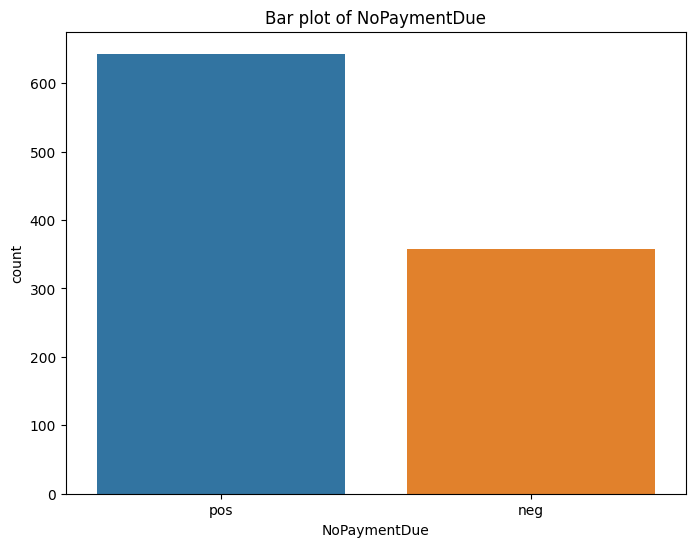

In [40]:
# explore the NoPaymentDue column in df1
data_exploration(df1, 'NoPaymentDue') 
# Positive class is the majority class, which is 20% more than the negative class
# The data is imbalanced, we may use stratified sampling to split the data

#### Service

Counts and percentages of unique values in Service:

                 Count  Percentage
fire_department    114   37.254902
navy                37   12.091503
army                35   11.437908
peace_corps         32   10.457516
marines             31   10.130719
foreign_legion      31   10.130719
air_force           26    8.496732


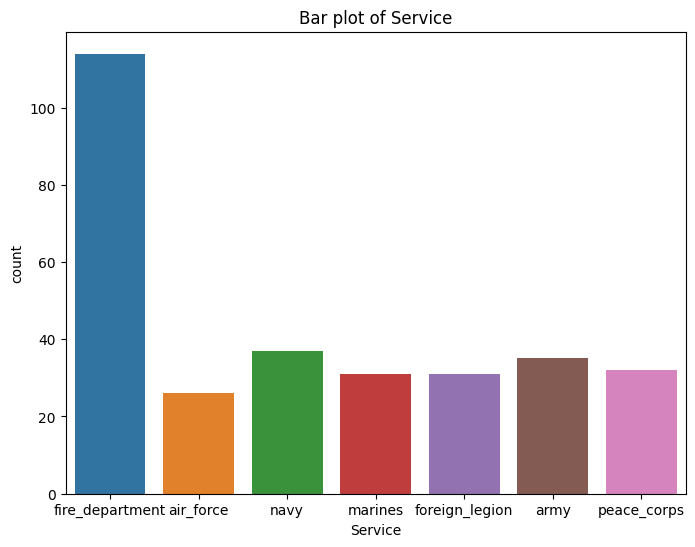

In [41]:
# explore the Service column in df2
data_exploration(df2, 'Service') 
# fire_department is the majority class

#### School

Counts and percentages of unique values in School:

      Count  Percentage
occ     247   20.686767
ucla    236   19.765494
uci     230   19.262982
smc     226   18.927973
ucsd    166   13.902848
ucb      89    7.453936


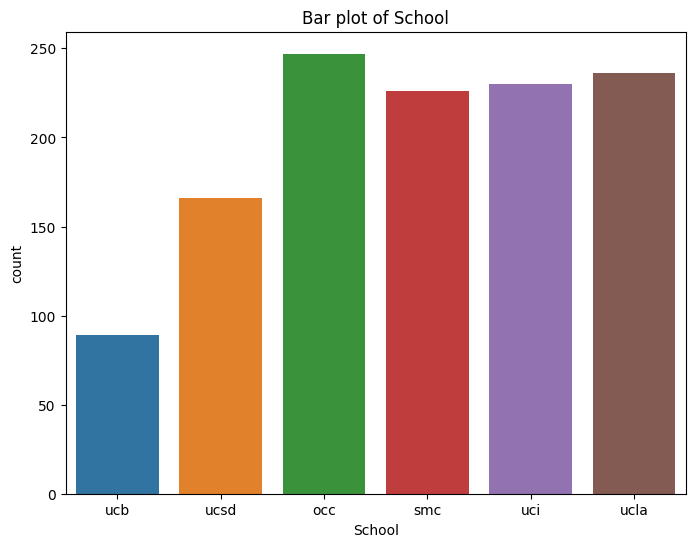

In [42]:
# explore school in df5
data_exploration(df5, 'School')

#### Units

Mean of Units: 6.39
Standard deviation of Units: 3.75
Number of outliers in Units: 0
Outliers values:
[]


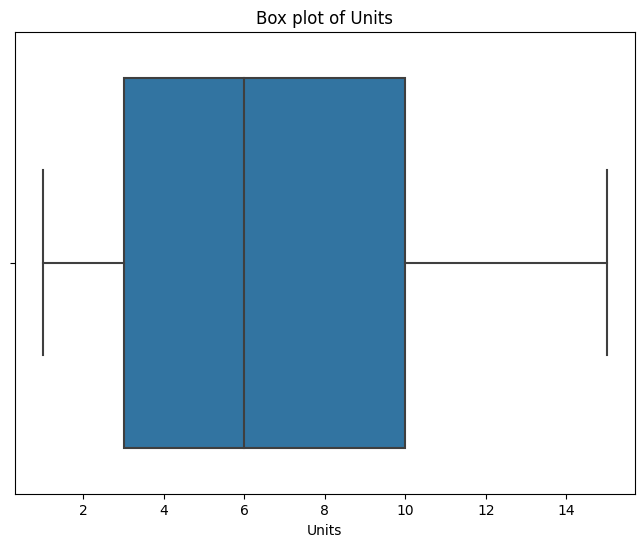

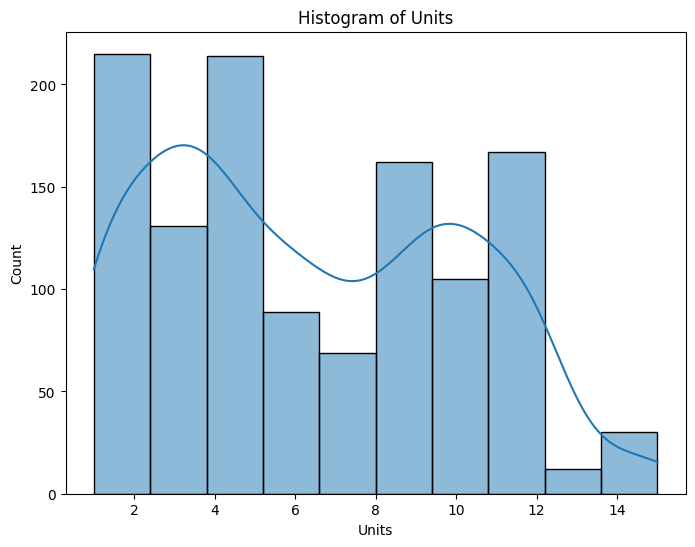

In [43]:
# explore the units in df5
data_exploration(df5, 'Units') # no outliers
# we may sum the units for people who have multiple school records

#### Country

Counts and percentages of unique values in Country:

        Count  Percentage
USA       999        99.9
Belize      1         0.1


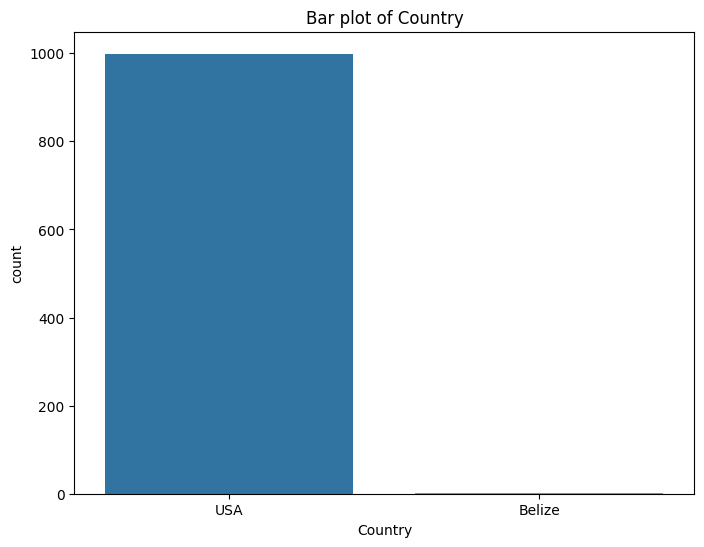

In [44]:
# explore the Country in df7
data_exploration(df6, 'Country') 
# 999 students are from the US, and 1 student is from Belize.
# This column may not useful for our analysis, we may drop this column

#### Region 

Counts and percentages of unique values in Region:

   Count  Percentage
3    207        20.7
5    206        20.6
2    203        20.3
4    202        20.2
1    182        18.2


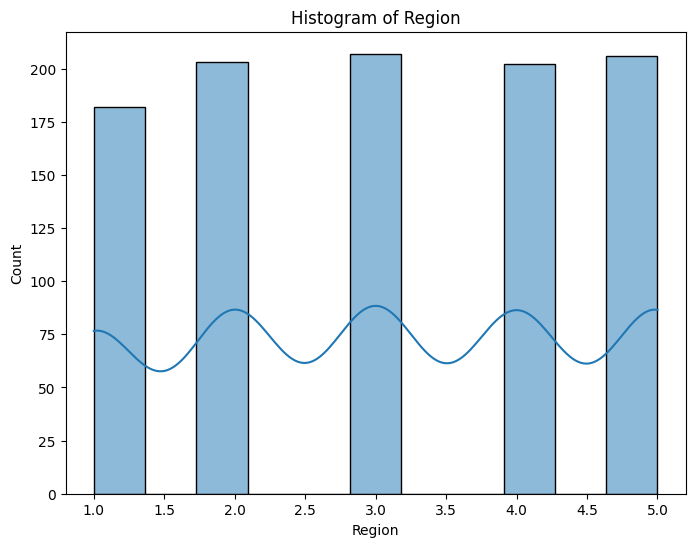

In [45]:
# explore region in df6
data_exploration(df6, 'Region')
# pretty balanced

#### Marital_Status

Counts and percentages of unique values in Marital_Status:

   Count  Percentage
1    545        54.5
0    454        45.4
2      1         0.1


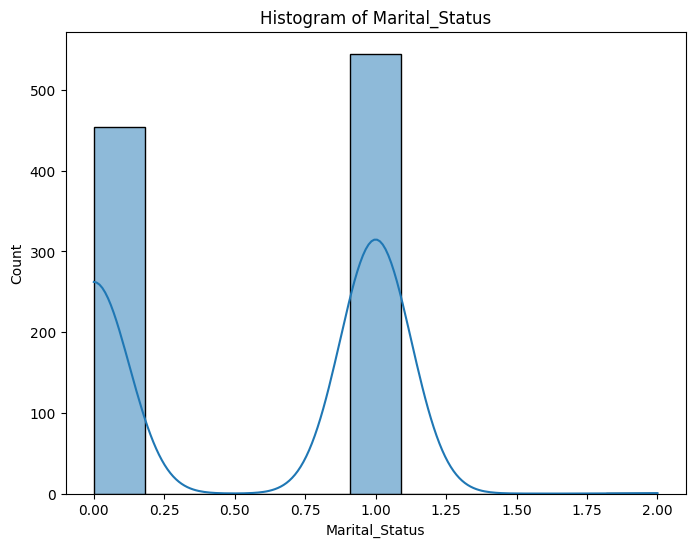

In [46]:
data_exploration(df6, 'Marital_Status')
# there is 0.1% of data is 2, which is not in the description
# it is likely an outlier or an error. Before deciding to drop the row, we should first try to understand the meaning of this value. 
# If the value '2' does not have any clear meaning or it is inconsistent with the problem context, we can consider dropping the row.

#### Gender	

Counts and percentages of unique values in Gender:

      Count  Percentage
Male    497       100.0


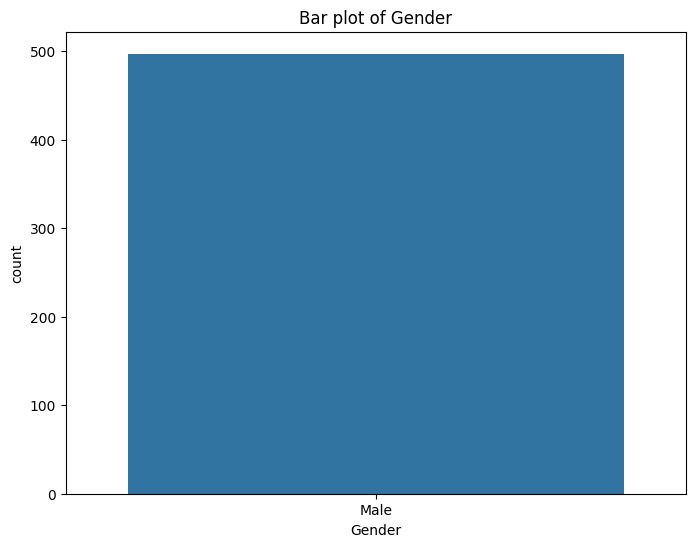

In [47]:
# explore the Gender in df7
data_exploration(df7, 'Gender') 
# since we have totally 1000 students, the data is almost balanced

#### Longest_Absence_From_School

Counts and percentages of unique values in Longest_Absence_From_School:

   Count  Percentage
4    120        12.0
5    110        11.0
3    104        10.4
0    100        10.0
7     99         9.9
2     96         9.6
6     95         9.5
1     93         9.3
8     93         9.3
9     90         9.0


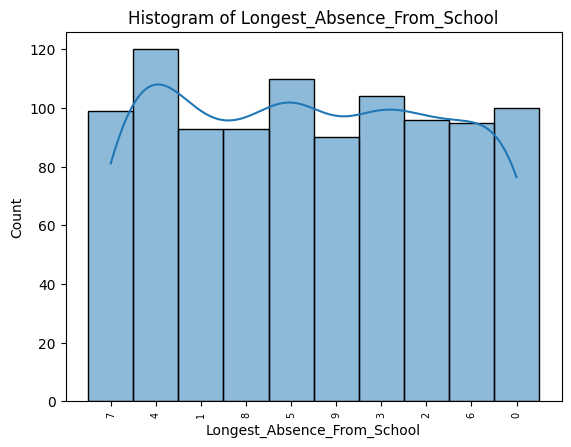

In [48]:
# explore the Longest_Absence_From_School in df8
data_exploration(df8, 'Longest_Absence_From_School')
# balanced data

#### LongTermPlanningScore

Mean of LongTermPlanningScore: 0.70
Standard deviation of LongTermPlanningScore: 0.17
Number of outliers in LongTermPlanningScore: 8
Outliers values:
[0.20067997 0.16686285 0.22992073 0.16196331 0.19883872 0.09097842
 0.1283446  0.17022491]


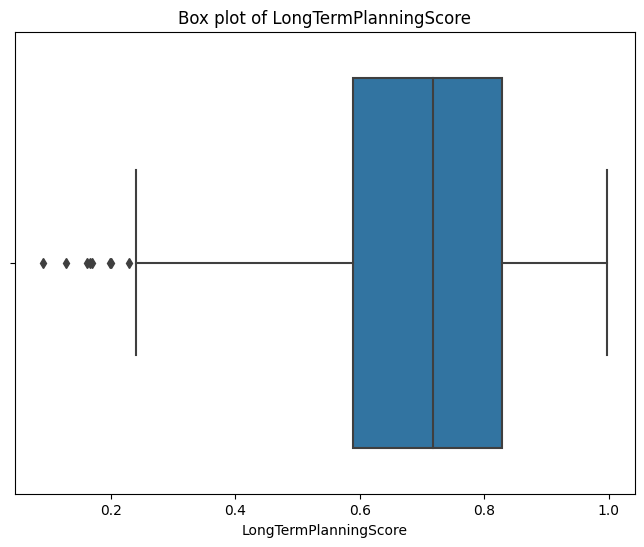

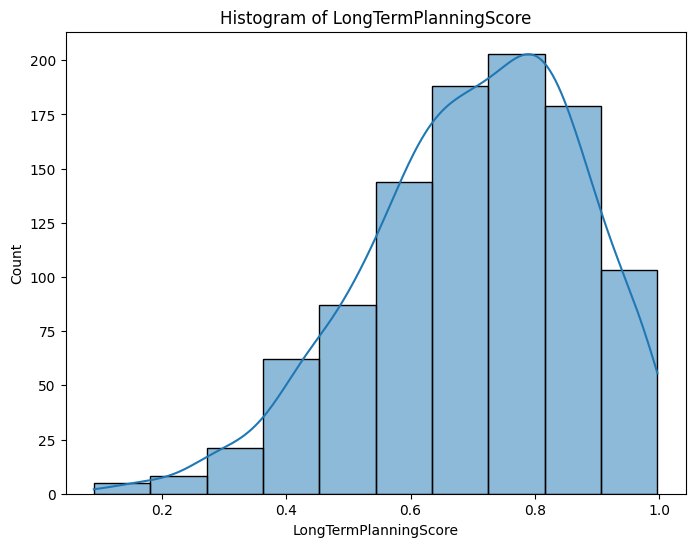

In [49]:
# explore LongTermPlanningScore in df10
data_exploration(df10, 'LongTermPlanningScore')
# there are 8 outliers(0.8% of the data),
# distribution is right skewed
# we may use some models that are less sentitive to outliers

#### DecisionStyle

Counts and percentages of unique values in DecisionStyle:

            Count  Percentage
Emotional     914        91.4
Analytical     86         8.6


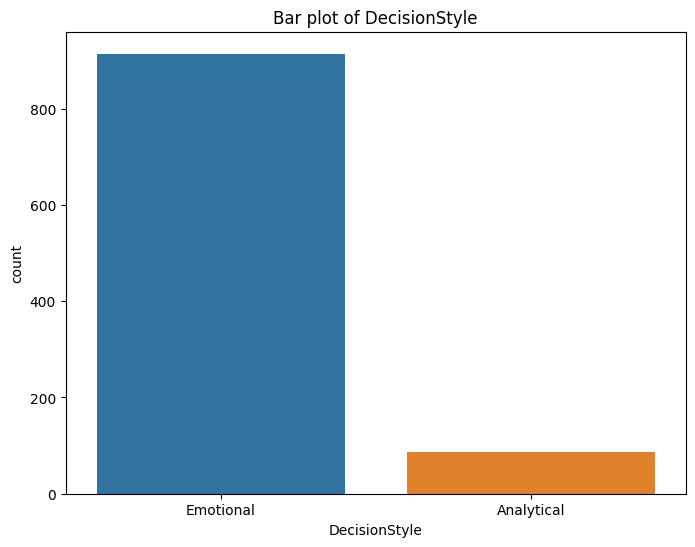

In [50]:
# explore DecisionStyle in df10
data_exploration(df10, 'DecisionStyle')
# unbalanced data, where emotional is the majority class

#### PowerOrientedScore

Mean of PowerOrientedScore: 0.61
Standard deviation of PowerOrientedScore: 0.20
Number of outliers in PowerOrientedScore: 6
Outliers values:
[0.0791475  0.10274739 0.07839175 0.07681959 0.09174184 0.10933996]


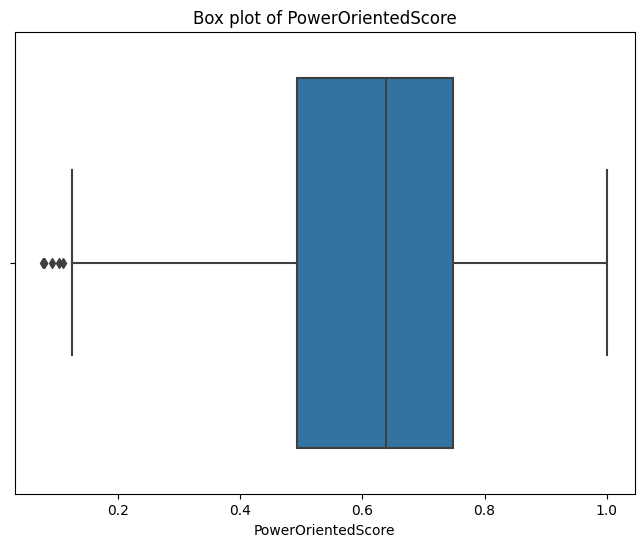

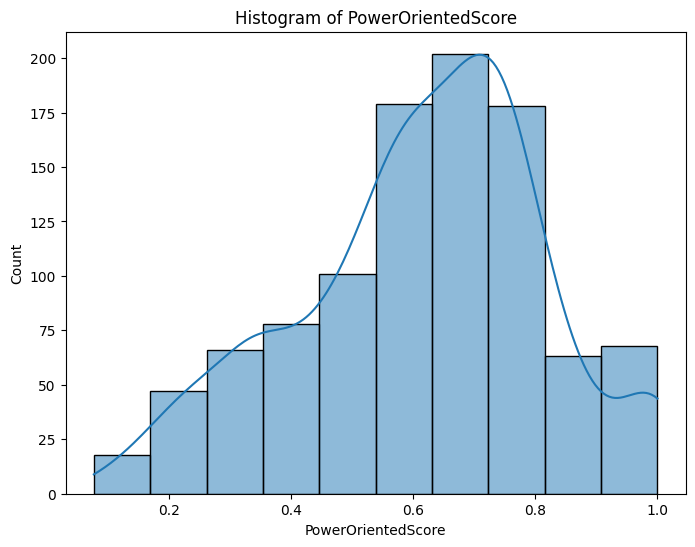

In [51]:
# explore PowerOrientedScore in df10
data_exploration(df10, 'PowerOrientedScore')
# there are 6 outliers(0.6% of the data),
# distribution is right skewed
# we may use some models that are less sentitive to outliers

#### CommunityOrientedScore

Mean of CommunityOrientedScore: 0.38
Standard deviation of CommunityOrientedScore: 0.21
Number of outliers in CommunityOrientedScore: 0
Outliers values:
[]


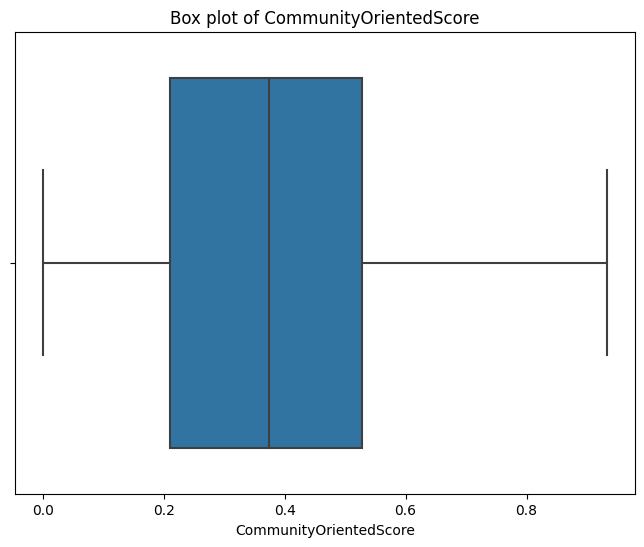

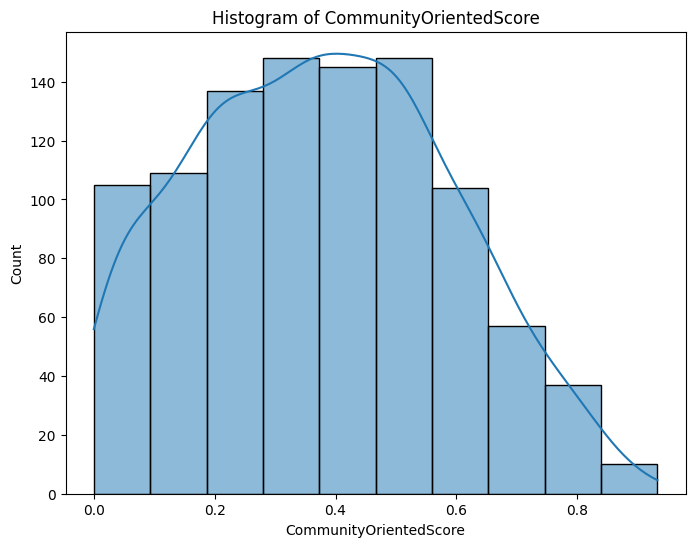

In [52]:
# explore CommunityOrientedScore in df10
data_exploration(df10, 'CommunityOrientedScore')
# no outliers
# almost normally distributed

#### Family_Income

Mean of Family_Income: 75443.84
Standard deviation of Family_Income: 22725.87
Number of outliers in Family_Income: 0
Outliers values:
[]


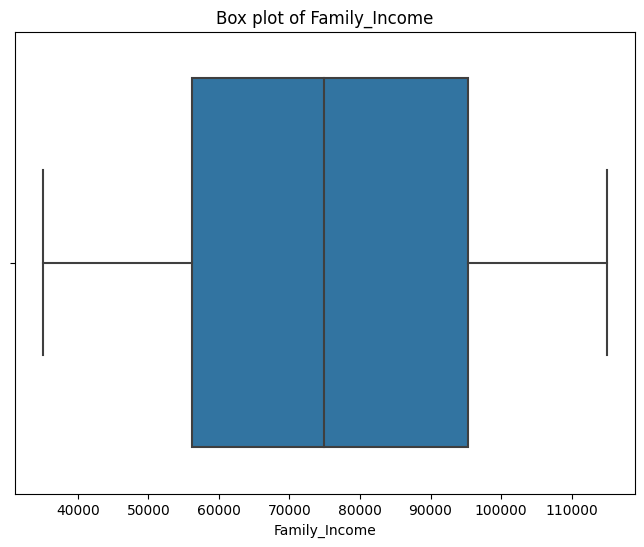

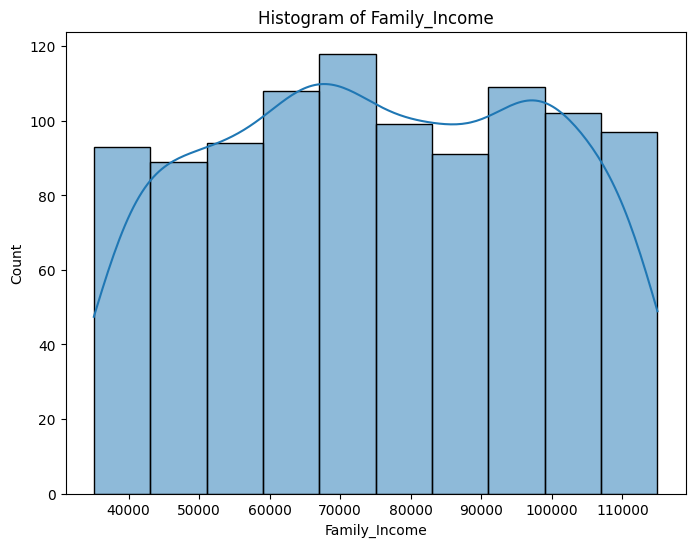

In [53]:
# explore Family_Income in df11
data_exploration(df11, 'Family_Income')
# no outliers
# almost normally distributed
# but we may need to normalize the data

#### Parent_Education_Level

Counts and percentages of unique values in Parent_Education_Level:

                   Count  Percentage
Doctorate            304        30.4
Bachelor's           301        30.1
HS or Lower          284        28.4
Master's             107        10.7
VERY HS or Lower       2         0.2
 VERY HS or Lower      1         0.1
GREAT                  1         0.1


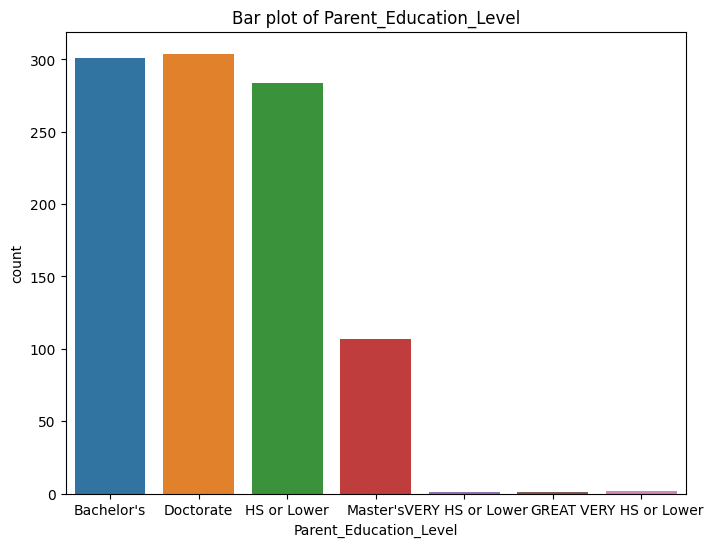

In [54]:
# explore Parent_Education_Level in df12
data_exploration(df12, 'Parent_Education_Level')
# there are two rare categories, which are VERY HS or Lower, and GREAT (VERY HS or Lower needs to be cleaned)
# we may need to group the categories
# we may need to drop the GREATE since it only has 1 record

#### Credit_Score_Raw

Mean of Credit_Score_Raw: 0.46
Standard deviation of Credit_Score_Raw: 0.24
Number of outliers in Credit_Score_Raw: 0
Outliers values:
[]


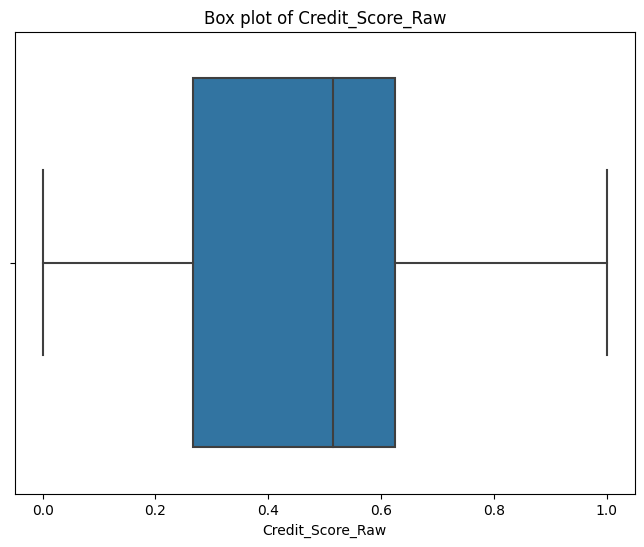

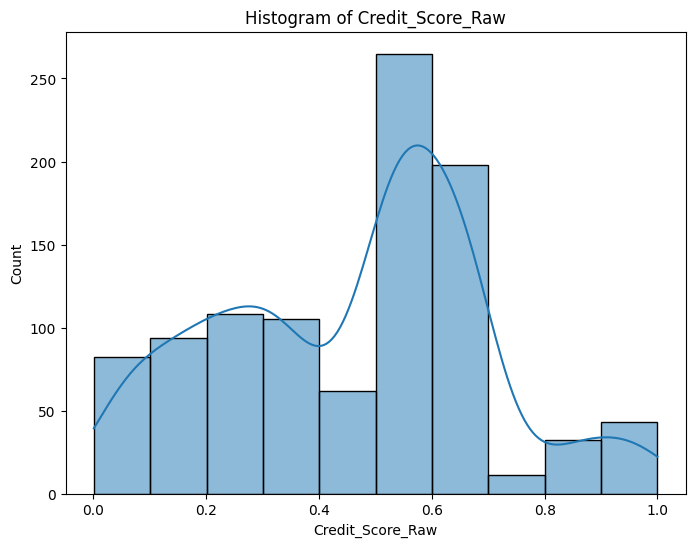

In [55]:
# eplore the Credit_Score_Raw in df13
data_exploration(df13, 'Credit_Score_Raw')

#### Credit_Score_AgeAdj

Mean of Credit_Score_AgeAdj: 0.55
Standard deviation of Credit_Score_AgeAdj: 0.20
Number of outliers in Credit_Score_AgeAdj: 0
Outliers values:
[]


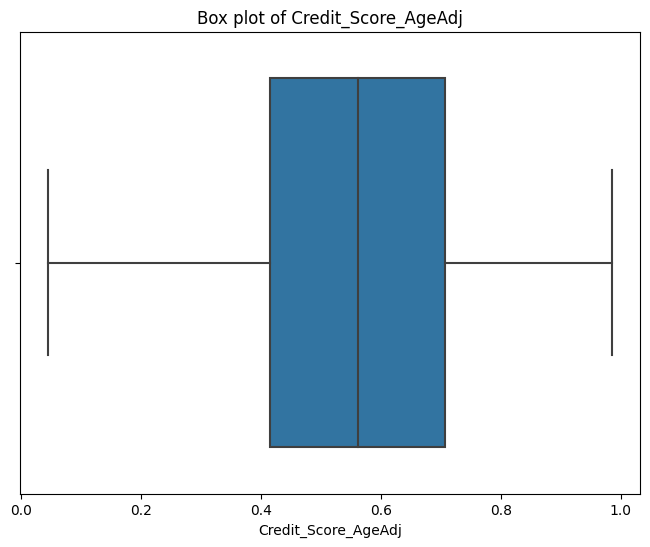

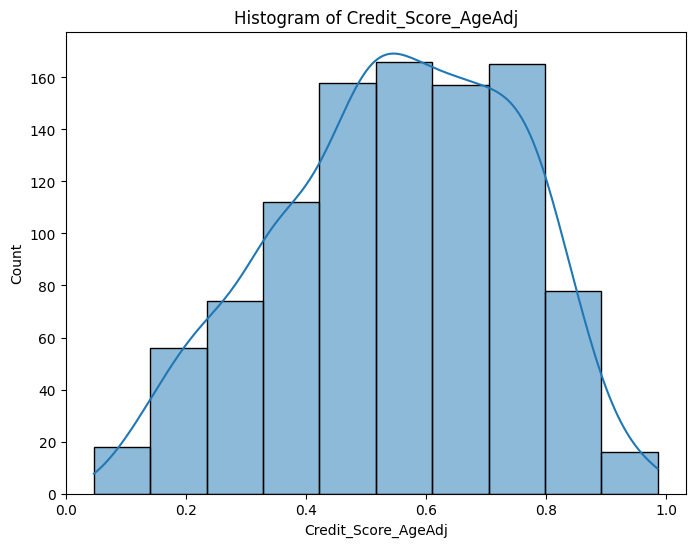

In [56]:
# explore the Credit_Score_AgeAdj in df13
data_exploration(df13, 'Credit_Score_AgeAdj')

#### Loan_Amount

Mean of Loan_Amount: 16859.18
Standard deviation of Loan_Amount: 3613.02
Number of outliers in Loan_Amount: 136
Outliers values:
[8118 6277 6969 7883 8430 8847 7820 8894 7819 7618 8448 8352 8145 8663
 8625 8455 8067 8306 9300 9281 9489 8654 8488 8790 5847 8309 8299 8020
 9042 9287 8851 8680 8434 8622 7984 8196 7776 9149 8429 8233 8661 7776
 8245 9334 7825 6306 7022 8347 8024 7954 8206 6850 8245 8947 8799 8757
 6620 9183 9411 8604 8963 9374 9473 8515 8930 8694 8686 8004 7541 9380
 7623 8047 7142 8014 8499 7879 9097 8140 8765 9393 6836 8918 9174 8479
 7989 8514 8914 8051 9099 9124 8786 7847 8392 7026 9017 7433 7655 7072
 6281 7846 7723 7380 7868 7581 8321 7506 8287 8268 9334 8934 7785 9487
 6053 7784 7870 9463 8474 9220 9003 7557 6323 8404 8279 8755 8137 8628
 7727 7694 9058 7830 7687 8509 8212 9299 8691 6178]


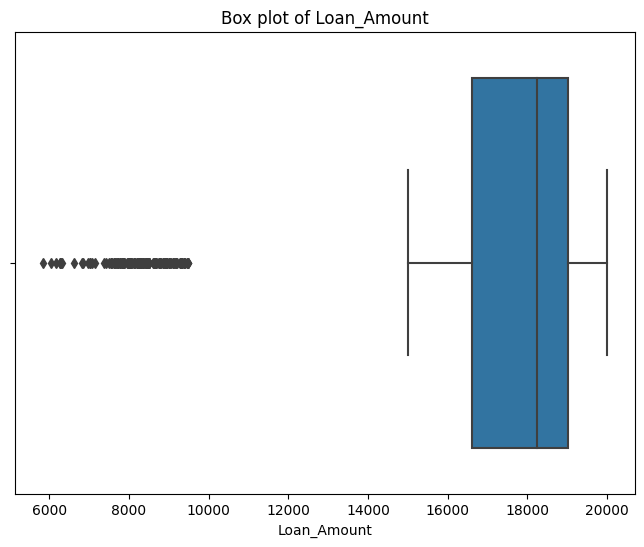

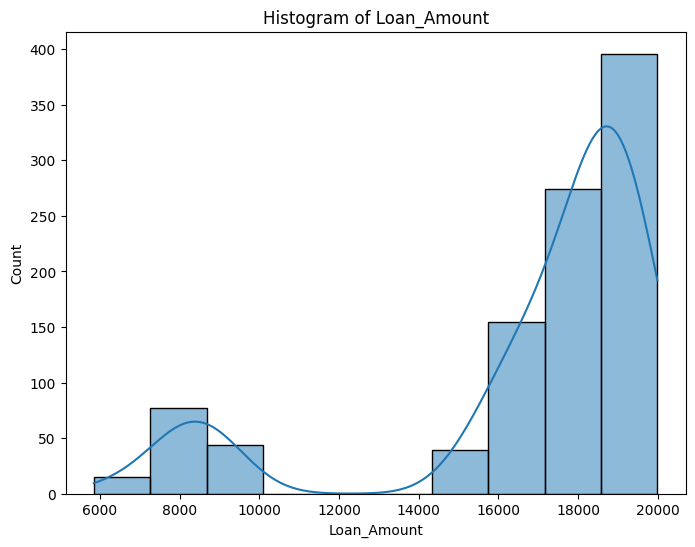

In [57]:
# explore the Loan_Amount in df14
data_exploration(df14, 'Loan_Amount')
# there are a lot of outliers
# it seems that the data has two peaks, which may be caused by two different types of loans or some other reasons
# we may need to group the data into two groups

#### HS_Math, HS_Science, HS_English

Counts and percentages of unique values in HS_Math:

      Count  Percentage
10.0    262        26.2
9.0     240        24.0
7.0     170        17.0
8.0     152        15.2
6.0     107        10.7
5.0      34         3.4
4.0      28         2.8
3.0       4         0.4
2.0       3         0.3


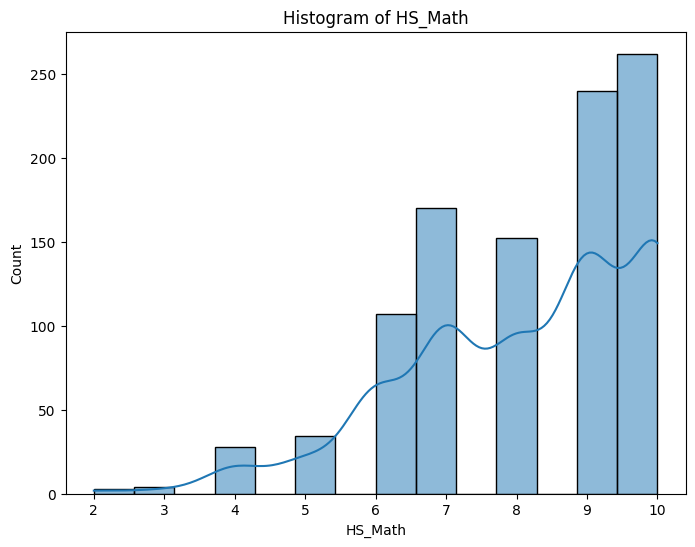

Counts and percentages of unique values in HS_Science:

      Count  Percentage
10.0    233        23.3
9.0     232        23.2
7.0     192        19.2
8.0     181        18.1
6.0     104        10.4
5.0      30         3.0
4.0      23         2.3
3.0       5         0.5


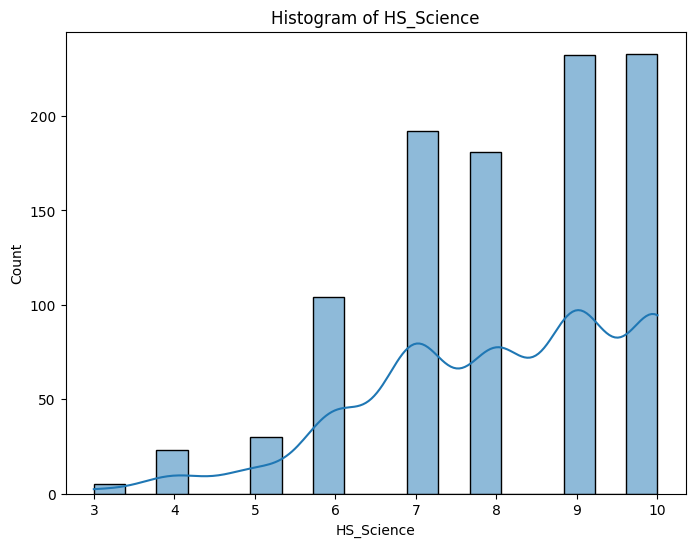

Counts and percentages of unique values in HS_English:

      Count  Percentage
9.0     234   23.780488
10.0    222   22.560976
8.0     196   19.918699
7.0     177   17.987805
6.0     105   10.670732
5.0      24    2.439024
4.0      20    2.032520
3.0       5    0.508130
2.0       1    0.101626


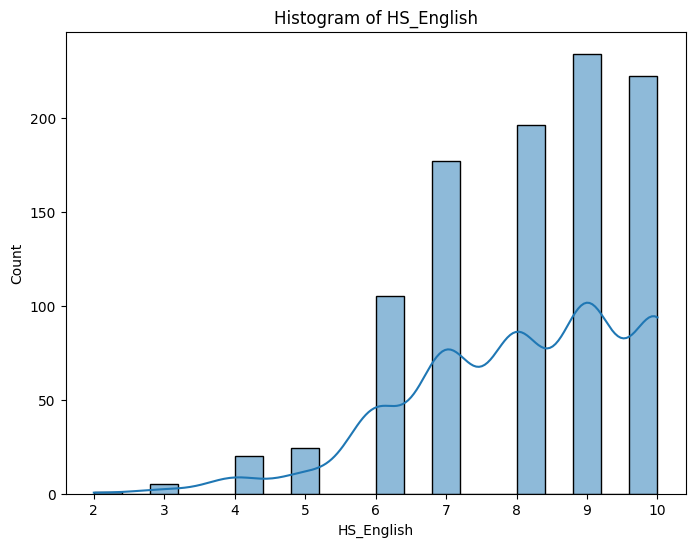

In [58]:
# explore all the columns in df15, except for the StudentID
for column in df15.columns[1:]:
    data_exploration(df15, column)

# HS_English has  is slightly skewed, and there are some outliers.
# we can consider using miss forest or median to impute the missing values

### Merge the raw files

In [59]:
# Add 'Enlisted' and 'Enrolled' columns to df1
df1_agg = df1.copy()
df1_agg['Enlisted'] = df1_agg['StudentID'].apply(lambda x: 1 if x in df2['StudentID'].values else 0)
df1_agg['Enrolled'] = df1_agg['StudentID'].apply(lambda x: 1 if x in df5['StudentID'].values else 0)

df2_agg = df2.groupby('StudentID').agg(TotalServices=('Service', 'count'), Service=('Service', lambda x: ';'.join(x))).reset_index()

# Update the aggregation for df5_agg to include the sum of Units
df5_agg = df5.groupby('StudentID').agg(TotalSchools=('School', 'count'), School=('School', lambda x: ';'.join(x)), Units=('Units', 'sum')).reset_index()

df_agg = df1_agg.merge(df2_agg, on='StudentID', how='left').merge(df5_agg, on='StudentID', how='left')

# Drop the TotalServices and TotalSchools columns since they are for aggregation checking only
df_agg.drop(['TotalServices', 'TotalSchools'], axis=1, inplace=True)

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units
0,1000,pos,1,1,air_force,ucsd;occ,14.0
1,999,pos,1,1,fire_department,smc,4.0
2,998,pos,0,1,NaN,ucb;smc,2.0
3,996,pos,1,1,navy,smc,11.0
4,994,pos,0,1,NaN,uci,9.0


(1000, 7)

In [60]:
# merge df_agg with df3
df_agg = df_agg.merge(df3, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)


,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN
1,999,pos,1,1,fire_department,smc,4.0,NaN
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN
3,996,pos,1,1,navy,smc,11.0,NaN
4,994,pos,0,1,NaN,uci,9.0,NaN


(1000, 8)

In [61]:
# add Unemployed column to df_agg by using df4

df_agg = df_agg.merge(df4, on='StudentID', how='left')


display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN


(1000, 9)

In [62]:
# merge df_agg and df6
df_agg = df_agg.merge(df6, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)


,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed,USA,1,1
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN,USA,2,1
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN,USA,5,0
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed,USA,3,1
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN,USA,3,1


(1000, 12)

In [63]:
# merge df_agg and df7
df_agg = df_agg.merge(df7, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed,USA,1,1,NaN
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN,USA,2,1,NaN
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN,USA,5,0,NaN
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed,USA,3,1,NaN
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN,USA,3,1,Male


(1000, 13)

In [64]:
# merge df_agg and df8
df_agg = df_agg.merge(df8, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed,USA,1,1,NaN,7
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN,USA,2,1,NaN,4
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN,USA,5,0,NaN,1
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed,USA,3,1,NaN,7
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN,USA,3,1,Male,1


(1000, 14)

In [65]:
# merge df_agg and df9
df_agg = df_agg.merge(df9, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed,USA,1,1,NaN,7,NaN
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN,USA,2,1,NaN,4,Filed_For_Bankruptcy
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN,USA,5,0,NaN,1,Filed_For_Bankruptcy
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed,USA,3,1,NaN,7,NaN
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN,USA,3,1,Male,1,NaN


(1000, 15)

In [66]:
# merge df_agg and df10, df11, df12, df13, df14, df15 since they have the 100% unique 1000 StudentID
df_agg = df_agg.merge(df10, on='StudentID', how='left')
df_agg = df_agg.merge(df11, on='StudentID', how='left')
df_agg = df_agg.merge(df12, on='StudentID', how='left')
df_agg = df_agg.merge(df13, on='StudentID', how='left')
df_agg = df_agg.merge(df14, on='StudentID', how='left')
df_agg = df_agg.merge(df15, on='StudentID', how='left')

In [67]:
display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Family_Income,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed,USA,1,1,NaN,7,NaN,0.843289,Emotional,0.808111,0.569837,54206.48,Bachelor's,0.639912,0.808111,16823,10.0,10.0,9.0
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN,USA,2,1,NaN,4,Filed_For_Bankruptcy,0.662624,Analytical,1.000000,0.004697,65238.16,HS or Lower,0.989682,0.597839,16943,9.0,9.0,6.0
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN,USA,5,0,NaN,1,Filed_For_Bankruptcy,0.994214,Analytical,0.855013,0.441015,67495.76,Doctorate,0.777285,0.441015,6178,8.0,9.0,5.0
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed,USA,3,1,NaN,7,NaN,0.889289,Emotional,0.780557,0.301059,83784.09,HS or Lower,0.612762,0.780557,17924,9.0,10.0,10.0
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN,USA,3,1,Male,1,NaN,0.860842,Emotional,0.829191,0.467755,104457.91,Doctorate,0.585587,0.829191,19106,9.0,9.0,4.0


(1000, 27)

In [68]:
# save the raw dataframe to csv called 'merged_raw_data.csv'
df_agg.to_csv('datasets\merged_raw_data.csv', index=False)

### Describe and Explore merged data

In [69]:
metadata(df_agg)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.000000,1000.000000,288.819436
1,NoPaymentDue,object,0,0.0,2,0.2,NaN,NaN,NaN
2,Enlisted,int64,0,0.0,2,0.2,0.000000,1.000000,0.450682
3,Enrolled,int64,0,0.0,2,0.2,0.000000,1.000000,0.196057
4,Service,object,717,71.7,14,1.4,NaN,NaN,NaN
5,School,object,40,4.0,14,1.4,NaN,NaN,NaN
6,Units,float64,40,4.0,20,2.0,1.000000,21.000000,4.032403
7,Disabled,object,905,90.5,1,0.1,NaN,NaN,NaN
8,Unemployed,object,902,90.2,1,0.1,NaN,NaN,NaN
9,Country,object,0,0.0,2,0.2,NaN,NaN,NaN


1. Other than the HS_English, we will need to format the categorical data. Missing values will be marked as other category.
   
2. The missing value for units will be marked as 0 since those students have not attended any school yet nor taken any units.

2. For school and service, We will need to use one-hot encoding to convert the categorical data into numerical data with new columns. 


#### Enroll

Counts and percentages of unique values in Enrolled:

   Count  Percentage
1    960        96.0
0     40         4.0


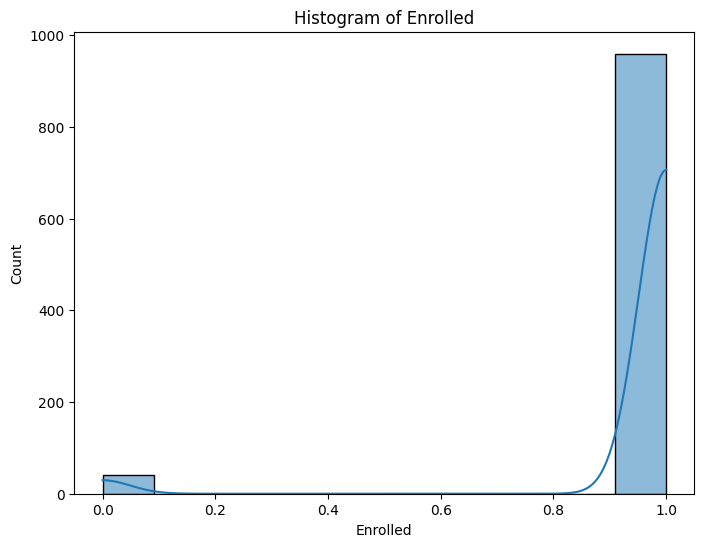

In [70]:
# explore enroll
data_exploration(df_agg, 'Enrolled')
# unbalanced data, where 1 (enrolled in school) is the majority class

#### School(aggregated)

Counts and percentages of unique values in School:

           Count  Percentage
occ          183   19.062500
ucla         179   18.645833
uci          173   18.020833
smc          170   17.708333
ucsd;occ      41    4.270833
ucsd;uci      41    4.270833
ucsd;ucla     39    4.062500
ucsd;smc      36    3.750000
ucb;occ       23    2.395833
ucb;smc       20    2.083333
ucb;ucla      18    1.875000
ucb;uci       16    1.666667
ucb           12    1.250000
ucsd           9    0.937500


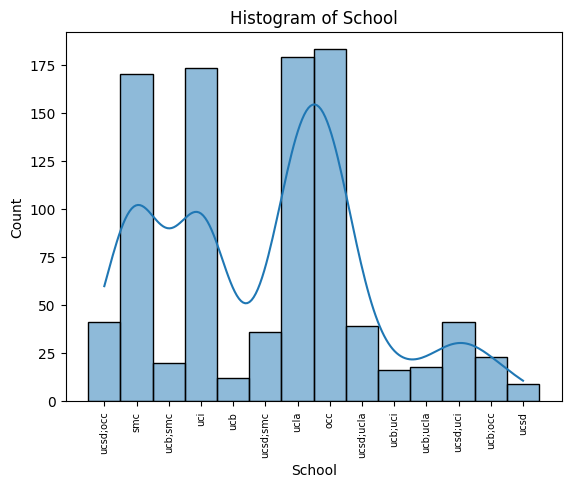

In [71]:
# explore school
data_exploration(df_agg, 'School')
# unbalanced data
# we may need to group the minor categories
# for example, ucsd;occ, ucsd;uci, ucsd;ucla, ucsd;smc could be grouped with ucsd

# or we may use one hot encoding to encode the data

#### Units(aggregated)

Mean of Units: 7.95
Standard deviation of Units: 4.03
Number of outliers in Units: 2
Outliers values:
[21. 21.]


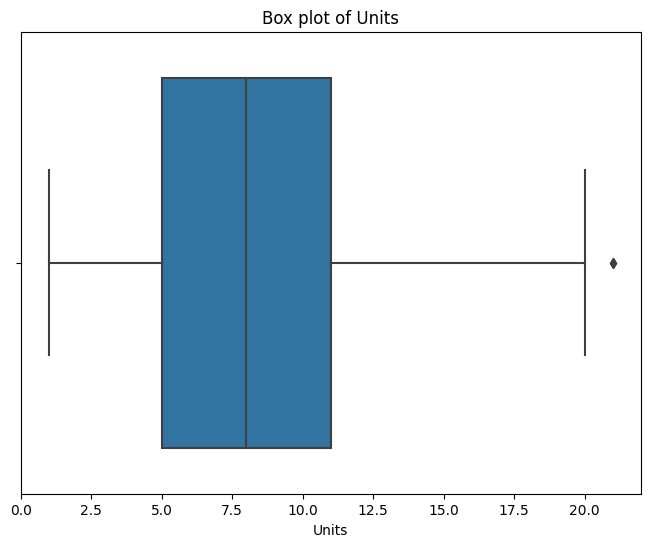

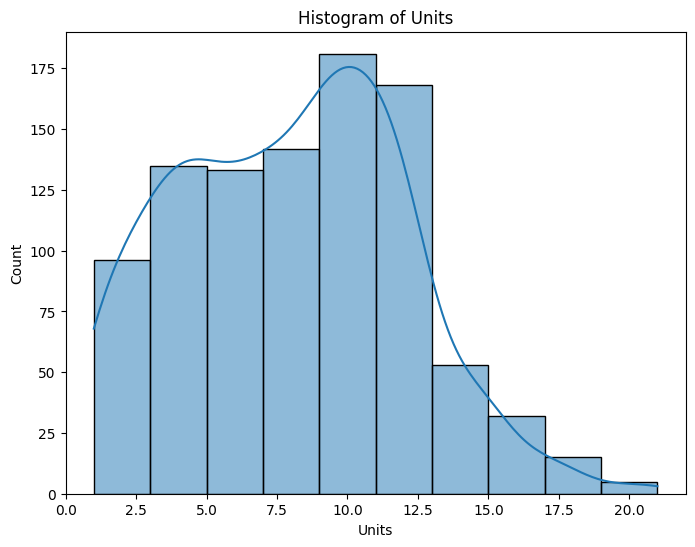

In [72]:
# explore Units
data_exploration(df_agg, 'Units') # only two outliers

#### Enlisted

Counts and percentages of unique values in Enlisted:

   Count  Percentage
0    717        71.7
1    283        28.3


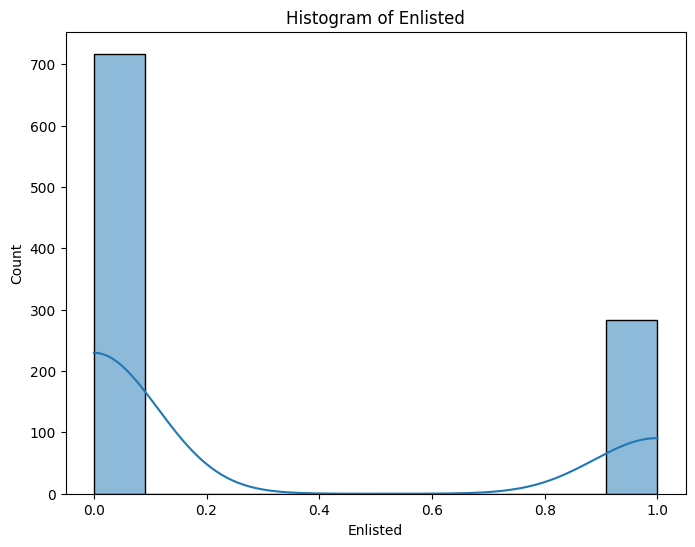

In [73]:
# explore Enlisted
data_exploration(df_agg, 'Enlisted') # unbalanced data, where 0 (not enlisted) is the majority class

#### Service(aggregated)

Counts and percentages of unique values in Service:

                                 Count  Percentage
fire_department                     88   31.095406
navy                                34   12.014134
peace_corps                         30   10.600707
marines                             29   10.247350
army                                29   10.247350
foreign_legion                      27    9.540636
air_force                           23    8.127208
fire_department;army                 6    2.120141
fire_department;foreign_legion       4    1.413428
fire_department;navy                 3    1.060071
fire_department;fire_department      3    1.060071
fire_department;air_force            3    1.060071
fire_department;marines              2    0.706714
fire_department;peace_corps          2    0.706714


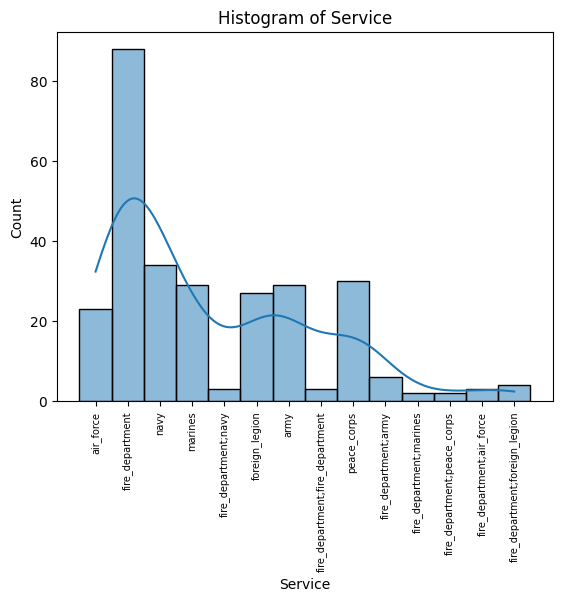

In [74]:
# explore Service
data_exploration(df_agg, 'Service')
# we can group the fire department categories together
# either group those minor categories into fire department
# or group those minor categories into corresponding major categories based on the second service

# or we may use one hot encoding to encode the data

In [75]:
# check the duplicated records
df_agg[df_agg.duplicated()]

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Family_Income,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English


Conclusion of the data understanding phase:
1. Impute the missing values based on the metadata
2. Group the some categorical data and even some numeric data into fewer categories
3. Drop the potential useless category with only one record - Marital_Status,Parent_Education_Level
4. Drop the potentially usesless column - Country, StudentID(Non-predictor)
5. Encode the some categorical data into numerical data
6. Use stratified sampling to split the data into training and testing data
7. Encode the target variable based on the target event
8. Orinalize the data based on the Table3 in the Project Description document
9. No duplicate records
10. Standardize numerical feature like family income

## Data Preparation

In [76]:
# Create a new dataframe called df_agg_cl, which is a copy of df_agg
df_agg_cl = df_agg.copy()

### Select Data

#### Drop the useless column

In [77]:
# Since the USA is the only country in the column if we drop the one record country which is Belize, we can drop the entire Country column
df_agg_cl.drop(['Country'], axis=1, inplace=True)

In [78]:
# drop the StudentID column since it is not useful for modeling
df_agg_cl.drop(['StudentID'], axis=1, inplace=True)

#### Drop the deviant record

In [79]:
# Since category 2 only has 1 record in Marital_Status, we can drop it
# drop the record that has Marital_Status = 2 in df_agg_cl
df_agg_cl = df_agg_cl[df_agg_cl['Marital_Status'] != 2]


In [80]:
# Similarly, we can drop the record that has Parent_Education_Level= GREATE
df_agg_cl = df_agg_cl[df_agg_cl['Parent_Education_Level'] != 'GREAT']

### Clean Data

#### Group Data 

In [81]:
# gourp HS or lower and VERY HS or Lower together
df_agg_cl['Parent_Education_Level'] = df_agg['Parent_Education_Level'].apply(lambda x: 'HS or Lower' if x == ' VERY HS or Lower' else x)
df_agg_cl['Parent_Education_Level'] = df_agg_cl['Parent_Education_Level'].apply(lambda x: 'HS or Lower' if x == 'VERY HS or Lower' else x)
df_agg_cl['Parent_Education_Level'].value_counts()
# We will  encode to ordinal

Doctorate      303
Bachelor's     301
HS or Lower    287
Master's       107
Name: Parent_Education_Level, dtype: int64

In [82]:
# Since the interval column 'Loan_Amount' has a lot of outliers that rougly form a group, we will group the data into two categorical groups
# If the Loan_Amount is less than 12000, we will group it into 0, otherwise, we will group it into 1
df_agg_cl['Loan_Amount'] = df_agg['Loan_Amount'].apply(lambda x: 0 if x < 12000 else 1)

df_agg_cl['Loan_Amount'].value_counts() # At this point, 1 is the high loan group, and 0 is the low loan group

1    862
0    136
Name: Loan_Amount, dtype: int64

#### Missing value imputation with a constant value

Replace the missing values with a constant value that does not appear in the dataset. This is usually done when the missing value itself has some specific meaning, e.g., when missing values indicate a 0 status.

In [83]:
# replace the missing values in the 'Units' column with 0
df_agg_cl['Units'].fillna(0, inplace=True)

In [84]:
# Disabled: 1, Missing Values: 0
df_agg_cl['Disabled'] = df_agg['Disabled'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [85]:
# Unemployed: 1; Missing Values: 0
df_agg_cl['Unemployed'] = df_agg['Unemployed'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [86]:
# Gender: Male- 1, Female- 0
df_agg_cl['Gender'] = df_agg['Gender'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [87]:
# Bankruptcy: Yes- 1, No- 0
df_agg_cl['Filed_For_Bankruptcy'] = df_agg['Filed_For_Bankruptcy'].apply(lambda x: 1 if pd.notnull(x) else 0)

#### Missing value imputation with Median

In [88]:
# since there is only 1.6% missing values in the HS_English column, and it is right skewed, we will replace the missing values with the median
df_agg_cl['HS_English'].fillna(df_agg_cl['HS_English'].median(), inplace=True)
# median is 8.0 so that we don't have to worry about the rounding float into integer

### Format Data 

#### Ordinalize the data

In [89]:
df_agg_cl['Parent_Education_Level'].value_counts()

Doctorate      303
Bachelor's     301
HS or Lower    287
Master's       107
Name: Parent_Education_Level, dtype: int64

In [90]:
# Ordinalize Encoding for Parent_Education_Level: HS or Lower -> Bachelor's -> Master's -> Doctorate
df_agg_cl['Parent_Education_Level'] = df_agg_cl['Parent_Education_Level'].map({'HS or Lower': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'Doctorate': 3})
df_agg_cl['Parent_Education_Level'].value_counts()

3    303
1    301
0    287
2    107
Name: Parent_Education_Level, dtype: int64

In [91]:
# Convert the Longest_Absence_From_School column from object to numeric
df_agg_cl['Longest_Absence_From_School'] = df_agg_cl['Longest_Absence_From_School'].astype('int64')

df_agg_cl['Longest_Absence_From_School'].value_counts()

4    119
5    109
3    104
0    100
7     99
2     96
6     95
1     93
8     93
9     90
Name: Longest_Absence_From_School, dtype: int64

#### Binary encoding

In [92]:
df_agg_cl['DecisionStyle'].value_counts()

Emotional     912
Analytical     86
Name: DecisionStyle, dtype: int64

In [93]:
# use binary encoding for the DecisionStyle column in case we need to use some models that require numeric data
df_agg_cl['DecisionStyle'] = df_agg_cl['DecisionStyle'].map({'Analytical': 0, 'Emotional': 1})

In [94]:
df_agg_cl['DecisionStyle'].value_counts()

1    912
0     86
Name: DecisionStyle, dtype: int64

#### Nomralize the data

Due to the potential scaling issue, we will need to normalize the the Family_Income

In [95]:
scaler = MinMaxScaler() # create a scaler object
df_agg_cl['Family_Income_normalized'] = scaler.fit_transform(df_agg_cl[['Family_Income']])

# drop the original Family_Income column
df_agg_cl.drop(['Family_Income'], axis=1, inplace=True)

In [96]:
display(df_agg_cl.loc[:5,'Family_Income_normalized'], df_agg_cl.shape)

0    0.239471
1    0.377550
2    0.405808
3    0.609683
4    0.868450
5    0.805415
Name: Family_Income_normalized, dtype: float64

(998, 25)

### Construct Data

In [97]:
# Perform one-hot encoding on the 'School' column, considering the aggregated values
# Set the separator to ';'
school_dummies = df_agg_cl['School'].str.get_dummies(sep=';')

# Add a 'School' prefix to the one-hot encoded columns
school_dummies.columns = ['School_' + col for col in school_dummies.columns]

# Concatenate the original DataFrame with the one-hot encoded columns
df_agg_cl_encoded = pd.concat([df_agg_cl, school_dummies], axis=1)

# Drop the original 'School' column
df_agg_cl_encoded.drop('School', axis=1, inplace=True)

display(df_agg_cl_encoded.iloc[:5,25:], df_agg_cl_encoded.shape)

,School_smc,School_ucb,School_uci,School_ucla,School_ucsd
0,0,0,0,0,1
1,1,0,0,0,0
2,1,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


(998, 30)

In [98]:
# Similarly, perform one-hot encoding on the 'Service' column, considering the aggregated values
# Set the separator to ';'
service_dummies = df_agg_cl_encoded['Service'].str.get_dummies(sep=';')

# Add a 'Service' prefix to the one-hot encoded columns
service_dummies.columns = ['Service_' + col for col in service_dummies.columns]

# Concatenate the original DataFrame with the one-hot encoded columns
df_agg_cl_encoded = pd.concat([df_agg_cl_encoded, service_dummies], axis=1)

# Drop the original 'Service' column
df_agg_cl_encoded.drop('Service', axis=1, inplace=True)

display(df_agg_cl_encoded.iloc[:5,29:], df_agg_cl_encoded.shape)

,Service_air_force,Service_army,Service_fire_department,Service_foreign_legion,Service_marines,Service_navy,Service_peace_corps
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0


(998, 36)

In [99]:
df1 = df_agg_cl_encoded.copy() # save a copy of the cleaned data for Task A

# save as csv file called 'TaskA.csv'
df1.to_csv('datasets/TaskA.csv', index=False)

## Modeling

### Encode Target Variable for A1

In [100]:
# Since the targt event is NoPaymentDue  = ‘pos’
# We will encode the target variable to 1 if NoPaymentDue = ‘pos’ and 0 otherwise for df_a1
df_a1 = df1.copy()
df_a1['NoPaymentDue'] = df1['NoPaymentDue'].map({'pos': 1, 'neg': 0})


Counts and percentages of unique values in NoPaymentDue:

   Count  Percentage
1    641   64.228457
0    357   35.771543


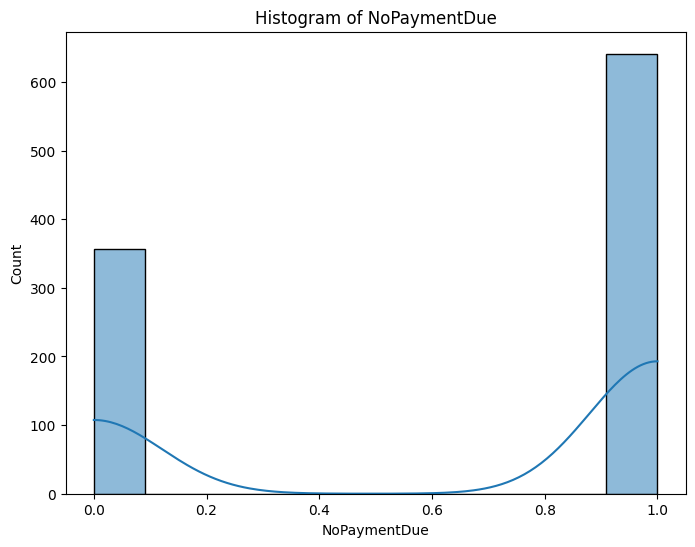

In [101]:
data_exploration(df_a1, 'NoPaymentDue') # notice that the target variable is imbalanced
# the model accuracy should be higher than 0.64 to be considered better than the baseline model

### Generate Test Design

The tree-based algorithms (DT, XGB, RF) can handle all types of measurements(Binary, Nominal, Interval, Ordinal) well without the need for one-hot encoding. 

Other models can handle binary, interval and ordinal data well after proper preprocessing but require one-hot encoding or other appropriate methods for nominal data. 

Therefore, we will use the tree-based algorithms for the initial model with df_a1.

And then, we need to do some extra data preprocessing for the other models.

Tree-based algorithms: DT, XGB, RF

Other models: LR, SVM, KNN, NB, MLP

#### Data Splitting

In [102]:
# split the data into training and testing sets - 70% training, 30% testing - Using stratified sampling
X = df_a1.drop('NoPaymentDue', axis=1)
y = df_a1['NoPaymentDue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666, stratify=y)

print("The length of training set:", len(X_train))
print("The length of testing  set:", len(y_test))

The length of training set: 698
The length of testing  set: 300


### Decision Tree

In [105]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10, int(len(X_train)*0.03), int(len(X_train)*0.06)],
    'criterion': ['gini', 'entropy']}

# Create the decision tree classifier model
dt_model = DecisionTreeClassifier(random_state=666)

# Create the grid search object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model from grid search
best_dt_model = grid_search.best_estimator_



Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [106]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier(random_state=666, **grid_search.best_params_)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Display the confusion matrix, classification report, and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_dt))


Confusion Matrix:
[[101   6]
 [  2 191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       107
           1       0.97      0.99      0.98       193

    accuracy                           0.97       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


Accuracy Score:
0.9733333333333334


The result looks good. We will check the structure of the tree if needed later.

### XGBoost

In [109]:
# Train the XGB model
xgb_model = xgb.XGBClassifier(random_state=666) # Initialize xgboost classifier 

# Fit the model to the training data
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test) # Get predictions

# Evaluate the performance of the XGB Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_xgb))

Confusion Matrix:
[[102   5]
 [  1 192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       107
           1       0.97      0.99      0.98       193

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300


Accuracy Score:
0.98


### Random Forest

In [113]:
# Create a Random Forest Classifier
model_rf = RandomForestClassifier(random_state=666)

# Define the random search parameters
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist, scoring='accuracy', n_iter=50, n_jobs=-1, cv=3, random_state=666)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)

# Evaluate the best model on the test set
rf_model = random_search.best_estimator_
y_pred_rf = rf_model.predict(X_test)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 130}
Confusion Matrix:
[[101   6]
 [  2 191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       107
           1       0.97      0.99      0.98       193

    accuracy                           0.97       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


Accuracy Score:
0.9733333333333334


### Extra Data Preparation for the other models

For models that are not tree-based, we need to do some extra data preprocessing on nominal data.

In [348]:
# check the region column in df_a1
df_a1['Region'].value_counts()

5    206
3    206
2    202
4    202
1    182
Name: Region, dtype: int64

In [351]:
# one-hot encode the 'Region' column
df_a1_2 = df_a1.copy()

df_a1_2 = pd.get_dummies(df_a1, columns = ['Region'])

display(df_a1_2.head(), df_a1_2.shape)

,NoPaymentDue,Enlisted,Enrolled,Units,Disabled,Unemployed,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English,Family_Income_normalized,School_occ,School_smc,School_ucb,School_uci,School_ucla,School_ucsd,Service_air_force,Service_army,Service_fire_department,Service_foreign_legion,Service_marines,Service_navy,Service_peace_corps,Region_1,Region_2,Region_3,Region_4,Region_5
0,1,1,1,14.0,0,1,1,0,7,0,0.843289,1,0.808111,0.569837,1,0.639912,0.808111,1,10.0,10.0,9.0,0.239471,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,1,4.0,0,0,1,0,4,1,0.662624,0,1.000000,0.004697,0,0.989682,0.597839,1,9.0,9.0,6.0,0.377550,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,1,2.0,0,0,0,0,1,1,0.994214,0,0.855013,0.441015,3,0.777285,0.441015,0,8.0,9.0,5.0,0.405808,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,1,11.0,0,1,1,0,7,0,0.889289,1,0.780557,0.301059,0,0.612762,0.780557,1,9.0,10.0,10.0,0.609683,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,1,9.0,0,0,1,1,1,0,0.860842,1,0.829191,0.467755,3,0.585587,0.829191,1,9.0,9.0,4.0,0.868450,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


(998, 40)

In [352]:
# split the data into training and testing sets - 70% training, 30% testing - Using stratified sampling
X1 = df_a1_2.drop('NoPaymentDue', axis=1)
y1 = df_a1_2['NoPaymentDue']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=666, stratify=y1)

print("The length of training set:", len(X_train1))
print("The length of testing  set:", len(y_test1))

The length of training set: 698
The length of testing  set: 300


### SVM

In [353]:
# Train an SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=666)
svm_model.fit(X_train1, y_train1)

# Make predictions using the SVM model
y_pred_svm = svm_model.predict(X_test1)

# Evaluate the performance of the SVM model
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test1, y_pred_svm))
print("\nAccuracy Score:")
print(accuracy_score(y_test1, y_pred_svm))


Confusion Matrix:
[[106   1]
 [  3 190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.99      0.98      0.99       193

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Accuracy Score:
0.9866666666666667


In [354]:
# Perform 5-fold cross-validation on the scaled data
cv_scores = cross_val_score(svm_model, X1, y1, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Check for overfitting by comparing performance on the training and test sets
y_pred_train_svm = svm_model.predict(X_train1)
train_accuracy = accuracy_score(y_train1, y_pred_train_svm)
test_accuracy = accuracy_score(y_test1, y_pred_svm)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    difference = train_accuracy - test_accuracy
    print("The training accuracy is higher than test accuracy by", difference)
    if difference > 0.1:  # Arbitrary threshold, adjust as needed
        print("There might be overfitting")
    else:
        print("The difference is small, overfitting might not be an issue")
else:
    print("Overfitting is not an issue")


Cross-Validation Scores: [0.985      0.995      0.975      0.98492462 0.97487437]
Average Cross-Validation Score: 0.982959798994975
Training Set Accuracy: 0.9871060171919771
Test Set Accuracy: 0.9866666666666667
The training accuracy is higher than test accuracy by 0.0004393505253104113
The difference is small, overfitting might not be an issue


Since we gain extremlly  high scores with SVM, we check the over fitting problem by using cross validation.
As it shows, there might be no over fitting problem, so we will keep this model and see if the performance is consistent among different models.

### KNN

In [355]:
# Define the hyperparameter grid
param_grid = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train1, y_train1)

print("Best Hyperparameters:")
print(knn_grid.best_params_)

Best Hyperparameters:
{'n_neighbors': 22}


In [356]:
# Get the best model from grid search
knn_model = KNeighborsClassifier(**knn_grid.best_params_)

# Train the model
knn_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test1)

# Display the confusion matrix, classification report, and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test1, y_pred_knn))
print("\nAccuracy Score:")
print(accuracy_score(y_test1, y_pred_knn))

Confusion Matrix:
[[ 92  15]
 [ 46 147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       107
           1       0.91      0.76      0.83       193

    accuracy                           0.80       300
   macro avg       0.79      0.81      0.79       300
weighted avg       0.82      0.80      0.80       300


Accuracy Score:
0.7966666666666666


KNN's performance can degrade in high-dimensional feature spaces, as the distance between points becomes less meaningful in higher dimensions.
Therefore, we think this is reason why KNN has a lower performance than SVM and Decision Tree.

### Multinomial Naive Bayes

In [357]:
# build the mnb model
mnb_model = MultinomialNB(fit_prior = False, alpha = 0.01)

# Train the model
mnb_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred_mnb = mnb_model.predict(X_test1)

# Display the confusion matrix, classification report, and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred_mnb))
print("\nClassification Report:")
print(classification_report(y_test1, y_pred_mnb))
print("\nAccuracy Score:")
print(accuracy_score(y_test1, y_pred_mnb))

Confusion Matrix:
[[102   5]
 [  9 184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       107
           1       0.97      0.95      0.96       193

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


Accuracy Score:
0.9533333333333334


It is suprising that Naive Bayes has a good performance as fit_prior is set to False when the target variable is imbalanced.

### Multilayer Perceptron

In [358]:
# Function to create a Keras model with specified hyperparameters
def create_model(optimizer='adam', neurons=32, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train1.shape[1],))) # dim is 39
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model with the KerasClassifier
model_mlp = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.3],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model_mlp , param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3)

# Fit the grid search to the data
grid_result = grid.fit(X_train1, y_train1)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_result.best_params_)


C:\Users\yuyum\AppData\Local\Temp\ipykernel_36696\1009986644.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_mlp = KerasClassifier(build_fn=create_model, verbose=0)


Best Hyperparameters:
{'batch_size': 16, 'dropout_rate': 0.1, 'epochs': 50, 'neurons': 128, 'optimizer': 'adam'}


In [360]:
# Create the best model based on the grid search with further manual tuning
mlp_model = Sequential()
mlp_model.add(Dense(128, activation='relu', input_dim=X_train1.shape[1]))
mlp_model.add(Dropout(0.1))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.1))
mlp_model.add(Dense(1, activation='sigmoid'))

mlp_model.compile(optimizer=keras.optimizers.RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train1, y_train1, validation_split=0.33, batch_size=16, epochs=50, verbose=0)

y_pred_mlp = mlp_model.predict(X_test1, verbose=0)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred_mlp.round())) # round() to convert probabilities to 0/1

print("\nClassification Report:")
print(classification_report(y_test1, y_pred_mlp.round()))

print("\nAccuracy Score:")
print(accuracy_score(y_test1, y_pred_mlp.round()))


Confusion Matrix:
[[103   4]
 [  4 189]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       107
           1       0.98      0.98      0.98       193

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


Accuracy Score:
0.9733333333333334


It is such a compuationally expensive model. And the accuracy is not as good as SVM and Decision Tree. 

### Logistic Regression

Before we use the logistic regression, we need to check the several assumptions of the logistic regression.
1. The dependent variable is binary or ordinal  [✓] - We have encoded the target variable into binary
2. The observations are independent of each other [✓] - Each student is independent of each other
3. There is no multicollinearity among the independent variables <input type="checkbox" name="checkbox" value="value">
4. There are no extreme outliers [✓] - We have checked the outliers in the data exploration phase
5. There are at least 50 observations per predictor variable [✓] - We have 39 predictor variables and 1000 observations
6. Linearity of independent variables and log odds <input type="checkbox" name="checkbox" value="value">

We will investigate the unchecked assumptions

In [364]:
# check multicollinearity
def get_vif(df):
    return pd.DataFrame({'variables': df.columns, 'VIF': [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]})

vif_df = get_vif(df_a1_2)
# only show the variables with VIF > 10 in vif_df
vif_df[vif_df['VIF'] > 10]

,variables,VIF
1,Enlisted,14.578697
11,DecisionStyle,10.134391
12,PowerOrientedScore,13.780237
15,Credit_Score_Raw,13.300572
22,School_occ,11.360771
23,School_smc,10.654836
25,School_uci,10.756645
26,School_ucla,10.977196
35,Region_1,45.991071
36,Region_2,51.612954


1. Enlisted: This variable can be predicted quite well by the other variables in the model, which means it is highly correlated with them.
2. DecisionStyle: This variable also exhibits a strong correlation with other variables in the model.
3. PowerOrientedScore: This variable seems to have high multicollinearity, indicating that it shares a lot of information with other variables in the model.
4. Credit_Score_Raw: This variable is also highly correlated with other variables in the model.
5. School_occ, School_smc, School_uci, School_ucla: These variables, presumably indicating different schools, seem to be highly correlated with other variables in your model. It's possible that the correlations are due to overlaps in the information these variables represent. For example, certain schools might be more or less likely to have students who enlist, have certain decision styles, etc.
6. Region_1, Region_2, Region_3, Region_4, Region_5: These variables, presumably dummy variables indicating different regions, have quite high VIF values. This might suggest that these regions are not as distinct as one might think in terms of the other variables in the model.

Our primary goal is prediction, multicollinearity may be less of a concern. With that being said, we will use regularization to reduce the multicollinearity.

And for checking other assumptions, we will use the summary of the model to check the p-value of each variable.

In [367]:
# Train a Logistic Regression model that use L2 regularization with C = 30, which is the inverse of regularization strength
lr_model = LogisticRegression(C = 30, penalty = 'l2',max_iter = 100, solver = 'liblinear', random_state=666) # 'liblinear' is good for small datasets and binary classification.

# Fit the model to the training data
lr_model.fit(X_train1, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test1)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test1, y_pred_lr))

print("\nAccuracy Score:")
print(accuracy_score(y_test1, y_pred_lr))

Confusion Matrix:
[[107   0]
 [  1 192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.99      1.00       193

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Accuracy Score:
0.9966666666666667


In [368]:
# Perform 5-fold cross-validation on the scaled data
cv_scores = cross_val_score(lr_model, X1, y1, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Check for overfitting by comparing performance on the training and test sets
y_pred_train_lr = lr_model.predict(X_train1)
train_accuracy = accuracy_score(y_train1, y_pred_train_lr)
test_accuracy = accuracy_score(y_test1, y_pred_lr)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    difference = train_accuracy - test_accuracy
    print("The training accuracy is higher than test accuracy by", difference)
    if difference > 0.1:  # Arbitrary threshold, adjust as needed
        print("There might be overfitting")
    else:
        print("The difference is small, overfitting might not be an issue")
else:
    print("Overfitting is not an issue")

Cross-Validation Scores: [0.985      0.995      0.985      0.97487437 0.9798995 ]
Average Cross-Validation Score: 0.9839547738693467
Training Set Accuracy: 0.995702005730659
Test Set Accuracy: 0.9966666666666667
Overfitting is not an issue


Scikit-learn is more focused on predictive modeling where p-values are less relevant.

To obtain p-values, we'd have to switch to using statsmodels or calculate them manually,

which is quite advanced and beyond the scope of a simple analysis

In [374]:
# Get the coefficients
coef = lr_model.coef_[0]

# get the feature names
feature_names = X1.columns

display(pd.DataFrame({'features': feature_names, 'coef': coef}))

,features,coef
0,Enlisted,2.298946
1,Enrolled,0.193766
2,Units,0.767621
3,Disabled,6.886766
4,Unemployed,7.249797
5,Marital_Status,0.199794
6,Gender,0.786858
7,Longest_Absence_From_School,-0.595373
8,Filed_For_Bankruptcy,1.456049
9,LongTermPlanningScore,-0.864880


As we can see that most of the columns that have high VIF values are not significant and have low impact in the model(checked the p-values in Rstudio by using statsmodels).

That might be the reason why the model has a very GOOD performance.

In [376]:
# Check Linearity of independent variables and log-odds - We are not going to include all the 39 graphs here
# Generate predicted probabilities
# y_pred_prob1 = lr_model.predict_proba(X_train1)[:, 1]

# For each feature plot the data points and the predicted probabilities
# for i in range(X_train1.shape[1]):
#     plt.figure(figsize=(8, 6))
#     # Plot predicted probabilities
#     plt.scatter(X_train1.iloc[:, i], y_pred_prob1)
#     plt.xlabel('Feature ' + str(i))
#     plt.ylabel('Predicted Probability')
#     plt.show()

In these plots, we're looking for an S-shaped curve, which would indicate that the linearity assumption holds.

logistic regression can still work reasonably well even if some of the assumptions are violated so we are not showing all the graphs here.

so we will keep this model.

## Assess model

In [377]:
# Create a function for highlighting the unique maximum values
def highlight_max(data, colors='teal'):
    attr = 'background-color: {}'
    data_styles = pd.DataFrame('', index=data.index, columns=data.columns)
    for i, column in enumerate(data):
        if pd.api.types.is_numeric_dtype(data[column]):
            max_value = data[column].max()
            max_value_count = (data[column] == max_value).sum()
            if max_value_count <= 2: # if there are more than 2 maximum values, don't highlight
                data_styles.loc[data[column] == max_value, column] = attr.format(colors)
    return data_styles

In [378]:
# define a function to get metrics
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # If the model is a Keras model (Sequential)
    if isinstance(model, keras.Sequential): # for mlp
        y_probs = model.predict(X_test, verbose=0)
        y_pred = y_probs.round().ravel() # convert probabilities to 0/1
        
    elif hasattr(model, "predict_proba"): 
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test) # for svm, dt

    # Calculate metrics
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc_roc = round(roc_auc_score(y_test, y_probs), 4)

    # Calculate the lift value at 3RD decile (30%)
    lift_table = kds.metrics.decile_table(y_test, y_pred.round(),labels=False)
    lift_table['lift_value'] = (lift_table['cum_resp_pct'] - lift_table['cum_cust_pct'])/(lift_table['cum_resp_pct_wiz'] - lift_table['cum_cust_pct'])
    sec_lift_score = lift_table[lift_table['decile'] == 3]['lift_value'].values[0]

    # calculate the stability
    if np.all(np.diff(lift_table.loc[:2, 'resp_rate']) <= 0) == True: # if the response rate is decreasing monotonically until second decile, the model is stable
        stab_score = 1
    else:
        stab_score = 0

    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1, "AUC_ROC": auc_roc, "Lift_Score": sec_lift_score, "Stability": stab_score}



In [379]:
svm_metrics = get_metrics(svm_model, X_test1, y_test1)
dt_metrics = get_metrics(dt_model, X_test, y_test)
knn_metrics = get_metrics(knn_model, X_test1, y_test1)
xgb_metrics = get_metrics(xgb_model, X_test, y_test)
mnb_metrics = get_metrics(mnb_model, X_test1, y_test1)
mlp_metrics = get_metrics(mlp_model, X_test1, y_test1)
rf_metrics = get_metrics(rf_model, X_test, y_test)
lr_metrics = get_metrics(lr_model, X_test1, y_test1)

10/10 [==============================] - 0s 955us/step


In [380]:
# Create a list of dictionaries containing model names and their metrics
all_metrics = [
    {"Model": "SVM", **svm_metrics},
    {"Model": "DT", **dt_metrics},
    {"Model": "KNN", **knn_metrics},
    {"Model": "XGB", **xgb_metrics},
    {"Model": "MNB", **mnb_metrics},
    {"Model": "MLP", **mlp_metrics},
    {"Model": "RF", **rf_metrics},
    {"Model": "LR", **lr_metrics}
]

# Convert the list of dictionaries into DataFrame
metrics_df = pd.DataFrame(all_metrics)

metrics_df.style.apply(highlight_max, axis=None)

,Model,Accuracy,Precision,Recall,F1,AUC_ROC,Lift_Score,Stability
0,SVM,0.986700,0.994800,0.984500,0.989600,0.999500,1.000000,1
1,DT,0.973300,0.969500,0.989600,0.979500,0.996400,0.906566,1
2,KNN,0.796700,0.907400,0.761700,0.828200,0.880600,0.719637,0
3,XGB,0.980000,0.974600,0.994800,0.984600,0.999700,0.875421,0
4,MNB,0.953300,0.973500,0.953400,0.963400,0.988300,0.875421,0
5,MLP,0.973300,0.979300,0.979300,0.979300,0.997800,0.906566,0
6,RF,0.973300,0.969500,0.989600,0.979500,0.998300,0.906566,0
7,LR,0.996700,1.000000,0.994800,0.997400,0.999900,1.000000,1


Logistic Regression has the best performance among all the models as it has a very high accuracy and also mantains high values for other metrics.
Thus the logistic regression model is selected as the best model for Task A1.

The features in your dataset are already on a similar scale or their ranges are not drastically different, then normalization might not be as crucial for Logistic Regression. In such cases, the algorithm can still converge and find a good solution.

Besides, the dataset meets most of the assumptions of the logistic regression while violating some of them slightly. And those variables that violate the assumptions are not significant in the model.

The goal of a machine learning model isn't to strictly satisfy every mathematical assumption or condition, but to make accurate and useful predictions on new, unseen data while meeting the requirments from the customer/end-user/project manager. 

## Score Dataset 

### Build the score dataset

Based on the dataset that logistic regression model is trained on, we will build the score dataset.

In [385]:
# Generate a score data set that consists of 35 new cases not found in the original Dataset, which is df_a1_2
# Set the random seed for reproducibility
np.random.seed(666)

# Select the records from df_a1, except the 'NoPaymentDue' column, as features
feature_columns = df_a1_2.drop('NoPaymentDue', axis=1)

# Calculate the min and max values for each numeric column
feature_mins = feature_columns.min()
feature_maxs = feature_columns.max()

# Generate 35 random instances for the feature columns with values within each column's range
num_columns = len(feature_columns.columns)
num_instances = 35
score_data = np.zeros((num_instances, num_columns))
for i, col in enumerate(feature_columns.columns):
    col_range = feature_maxs[col] - feature_mins[col]
    np.random.seed(i)
    score_data[:, i] = np.random.uniform(feature_mins[col], feature_maxs[col], size=num_instances)

# Create a list of column names
column_names = list(feature_columns.columns) 

score_raw = pd.DataFrame(score_data, columns=column_names)

# List of columns that should not be rounded
columns_to_exclude = [
    "LongTermPlanningScore",
    "PowerOrientedScore",
    "CommunityOrientedScore",
    "Credit_Score_Raw",
    "Credit_Score_AgeAdj",
    "Family_Income_normalized"
]

# Function to round values if the column is not in the excluded list
def round_values(col):
    if col.name not in columns_to_exclude:
        return col.round().astype(int)
    return col

# Apply the function to the DataFrame
score_df = score_raw.apply(round_values)

display(score_df.head(), score_df.shape) # 35 rows, 35 columns as expected, without target variable

,Enlisted,Enrolled,Units,Disabled,Unemployed,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English,Family_Income_normalized,School_occ,School_smc,School_ucb,School_uci,School_ucla,School_ucsd,Service_air_force,Service_army,Service_fire_department,Service_foreign_legion,Service_marines,Service_navy,Service_peace_corps,Region_1,Region_2,Region_3,Region_4,Region_5
0,1,0,9,1,1,0,1,1,1,0.100376,1,0.243241,0.143871,2,0.514301,0.843589,0,4,8,3,0.588131,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,1,1,0
1,1,1,1,1,1,1,0,7,1,0.545605,0,0.094799,0.690236,1,0.773332,0.214019,1,6,7,8,0.897714,0,0,1,1,1,1,1,1,0,0,1,0,0,1,0,1,0,1
2,1,0,12,0,1,0,1,4,1,0.540078,1,0.504454,0.245661,2,0.870523,0.096987,1,4,9,4,0.891531,1,0,1,1,0,1,1,0,0,1,1,1,0,0,0,1,0,1
3,1,0,9,1,1,1,0,7,1,0.212209,1,0.746064,0.497843,3,0.008776,0.385660,0,3,4,3,0.815837,0,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1
4,0,0,9,1,1,0,0,9,0,0.219711,0,0.464743,0.013700,3,0.310244,0.304711,0,8,9,5,0.035890,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,1,1,1


(35, 39)

### Apply the model to the score dataset

In [386]:
# apply the lr model to the score data set
score_df_a1 = score_df.copy()
score_df_a1['NoPaymentDue'] = lr_model.predict(score_df)

# display the score data set with the predicted target variable
display(score_df_a1.head(), score_df_a1['NoPaymentDue'].value_counts())

,Enlisted,Enrolled,Units,Disabled,Unemployed,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English,Family_Income_normalized,School_occ,School_smc,School_ucb,School_uci,School_ucla,School_ucsd,Service_air_force,Service_army,Service_fire_department,Service_foreign_legion,Service_marines,Service_navy,Service_peace_corps,Region_1,Region_2,Region_3,Region_4,Region_5,NoPaymentDue
0,1,0,9,1,1,0,1,1,1,0.100376,1,0.243241,0.143871,2,0.514301,0.843589,0,4,8,3,0.588131,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,1,1,0,1
1,1,1,1,1,1,1,0,7,1,0.545605,0,0.094799,0.690236,1,0.773332,0.214019,1,6,7,8,0.897714,0,0,1,1,1,1,1,1,0,0,1,0,0,1,0,1,0,1,1
2,1,0,12,0,1,0,1,4,1,0.540078,1,0.504454,0.245661,2,0.870523,0.096987,1,4,9,4,0.891531,1,0,1,1,0,1,1,0,0,1,1,1,0,0,0,1,0,1,1
3,1,0,9,1,1,1,0,7,1,0.212209,1,0.746064,0.497843,3,0.008776,0.385660,0,3,4,3,0.815837,0,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,1
4,0,0,9,1,1,0,0,9,0,0.219711,0,0.464743,0.013700,3,0.310244,0.304711,0,8,9,5,0.035890,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,1,1,1,1


1    34
0     1
Name: NoPaymentDue, dtype: int64

# Task A2

## Assess model

Since the project team thought that it would be better to have an explanatory model. We can pick the decision tree model as the best model for Task A2.
Let's first check the structure of the tree to see if it is easy to interpret and meet the requirement.

### Decision Tree

In [228]:

# Display the hyperparameters used in the decision tree model
print("Decision Tree Model Hyperparameters:")
print({'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2})

Decision Tree Model Hyperparameters:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


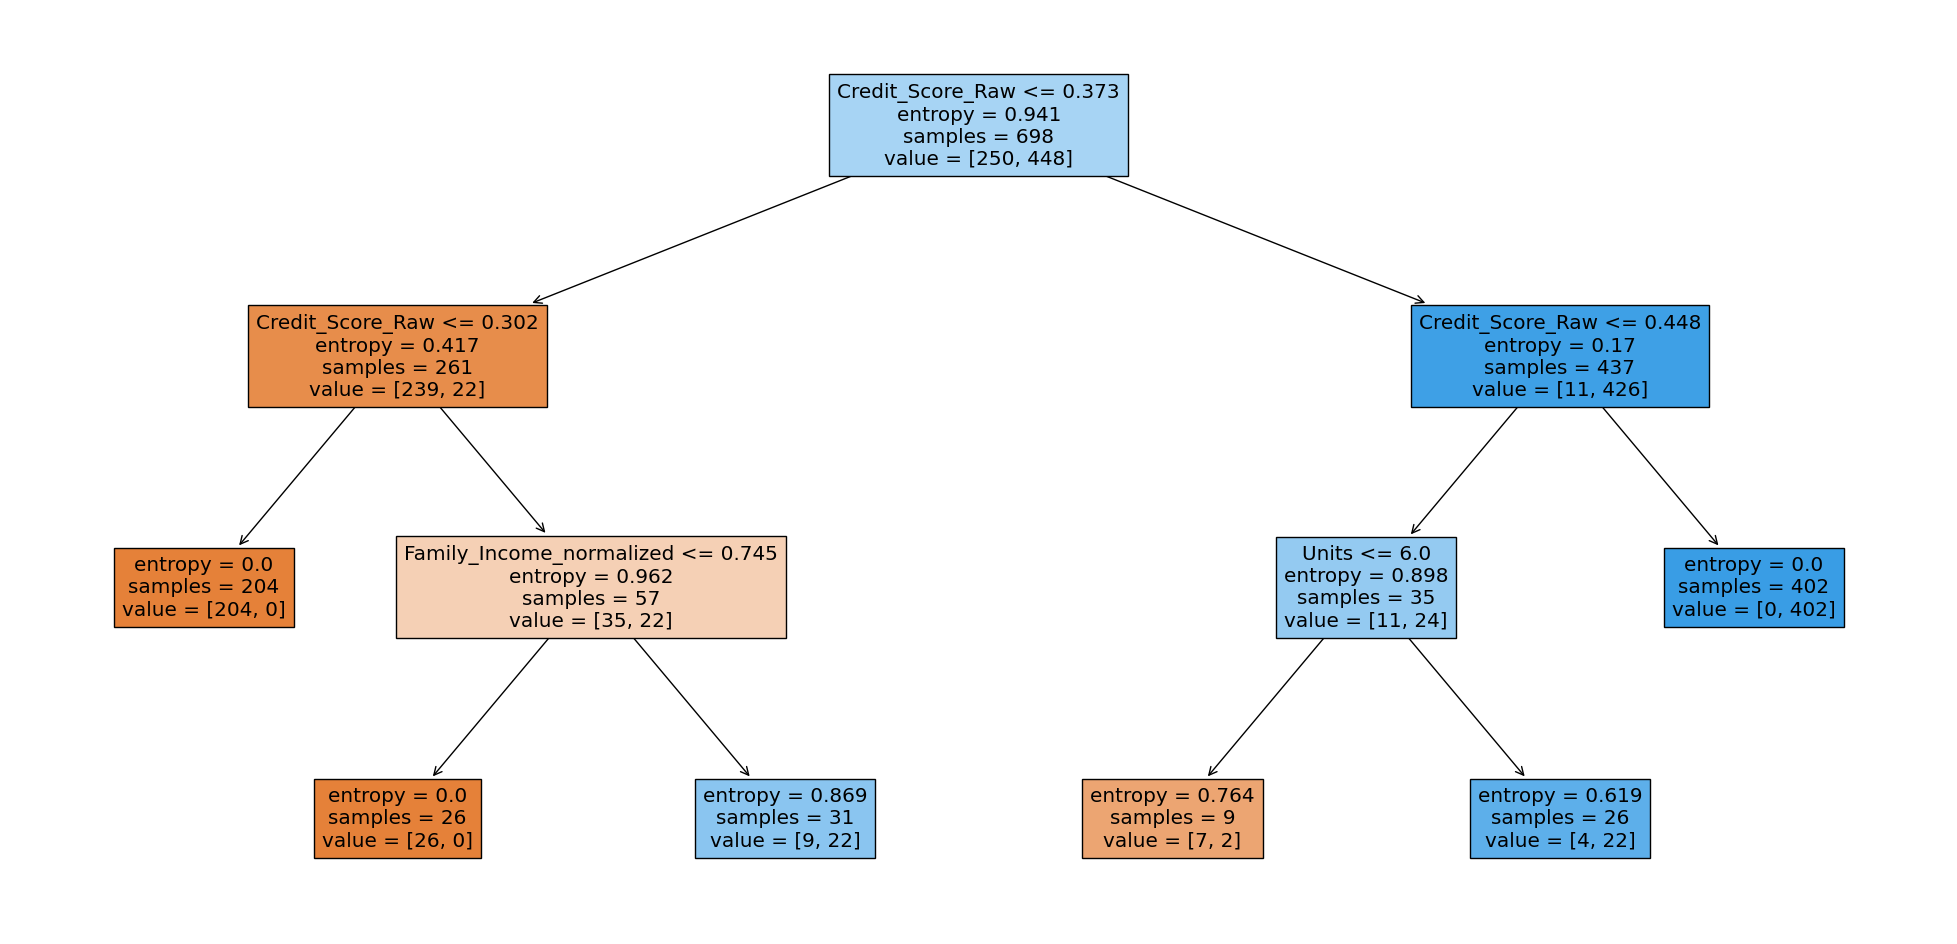

In [226]:
# plot the decision tree
fig = plt.figure(figsize=(25,12))
_ = tree.plot_tree(dt_model, feature_names = list(X.columns.values), filled = True)


The ideal leaf size is set between 4 and 6 cut off leaf sizes are <=3 or >=9.
The leaf size of the DT model is 6, which is within the ideal range.
Therefore, decision tree is selected as the best model for Task A2.

In [240]:
dt_df = metrics_df.loc[metrics_df['Model'] == 'DT',:]

# add the simplicity score to the dt_df, which is 1
with pd.option_context('mode.chained_assignment', None):   
    dt_df['Simplicity'] = [1]

dt_df # performance metrics for the decision tree model

,Model,Accuracy,Precision,Recall,F1,AUC_ROC,Lift_Score,Stability,Simplicity
1,DT,0.9733,0.9695,0.9896,0.9795,0.9964,0.906566,1,1


## Score Dataset

score dataset is the same as the one in Task A1, which is without the target variable.

In [248]:
# apply the DT model to the score data set
score_df_a2 = score_df.copy()
score_df_a2['NoPaymentDue'] = dt_model.predict(score_df)

display(score_df_a2.head(), score_df_a2['NoPaymentDue'].value_counts())

,Enlisted,Enrolled,Units,Disabled,Unemployed,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English,Family_Income_normalized,School_occ,School_smc,School_ucb,School_uci,School_ucla,School_ucsd,Service_air_force,Service_army,Service_fire_department,Service_foreign_legion,Service_marines,Service_navy,Service_peace_corps,NoPaymentDue
0,1,0,9,1,1,2,1,0,8,0,0.789684,0,0.219140,0.725349,2,0.848929,0.255740,0,7,4,7,0.048725,0,1,1,1,0,0,1,1,1,0,1,0,0,1
1,1,1,1,1,1,4,0,1,9,1,0.109777,0,0.760019,0.221625,2,0.179500,0.537550,1,6,8,9,0.289110,0,1,1,1,1,1,1,0,0,1,0,0,1,0
2,1,0,12,0,1,2,1,0,8,0,0.664973,0,0.319907,0.768783,3,0.055059,0.563430,0,9,5,9,0.720966,0,1,1,0,1,1,0,0,1,1,1,0,0,0
3,1,0,9,1,1,5,0,1,5,0,0.769287,1,0.569557,0.900711,0,0.362008,0.088754,0,3,4,9,0.021616,1,0,0,0,1,1,0,1,0,1,1,0,1,0
4,0,0,9,1,1,3,0,1,2,0,0.542554,0,0.090275,0.907101,1,0.275934,0.384900,1,9,5,2,0.205923,0,0,0,0,1,0,1,0,1,0,1,1,0,0


0    19
1    16
Name: NoPaymentDue, dtype: int64

# Task A3

# Task A4

After reviewing the outputs of the previous tasks, some of the end-user experts remarked that it might also be useful to incorporate the fact that it was more costly to misclassify a person from whom a payment was really due than to misclassify a person from whom no payment was due. Ms. Imani Kuhn suggested that they should research the relevant costs.

The result of their research was that there were an:
* average profit of 817.00 for correctly classifying a person for whom a  payment was really due -TN
* average profit of 245.00 for correctly classifying a person for whom no payment was really due -TP, NoPaymentDue = ‘pos'
* average loss of 671.00 for misclassifying a person for whom a payment was really due - FN
* average loss of 465.00 for misclassifying a person for whom no payment was really due - FP

The target event is NoPaymentDue = ‘pos’.

In [260]:
# build a function to calculate the gross profit, average gross profit, and normalized score for profit
def get_profit(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred.round())
    TN, FP, FN, TP = cm.ravel()
    profit_TN = 817
    profit_TP = 245
    loss_FN = 671
    loss_FP = 465
    gross_profit = (TP * profit_TP) + (TN * profit_TN) - (FP * loss_FP) - (FN * loss_FN) # gross profit, which is the sum of the profit and loss
    num_cases = len(y_test) # number of cases
    avg_profit = gross_profit / num_cases # average gross profit
    avg_bpp = (( (TP + FN) * profit_TP) + ( (TN + FP) * profit_TN)) / num_cases # average best possible profit
    normalized_score = (avg_profit - 0)/(avg_bpp - 0)
    return {"Gross Profit": gross_profit, "Average Profit": avg_profit, "Normalized Score": normalized_score}

In [263]:
svm_profitmetrics = get_profit(y_pred_svm, y_test)
dt_profitmetrics = get_profit(y_pred_dt, y_test)
knn_profitmetrics = get_profit(y_pred_knn, y_test)
xgb_profitmetrics = get_profit(y_pred_xgb, y_test)
mnb_profitmetrics = get_profit(y_pred_mnb, y_test)
mlp_profitmetrics = get_profit(y_pred_mlp, y_test)
rf_profitmetrics = get_profit(y_pred_rf, y_test)
lr_profitmetrics = get_profit(y_pred_lr, y_test)

In [276]:
# Create a list of dictionaries containing model names and their profit metrics
all_profit_metrics = [
    {"Model": "SVM", **svm_profitmetrics},
    {"Model": "DT", **dt_profitmetrics},
    {"Model": "KNN", **knn_profitmetrics},
    {"Model": "XGB", **xgb_profitmetrics},
    {"Model": "MNB", **mnb_profitmetrics},
    {"Model": "MLP", **mlp_profitmetrics},
    {"Model": "RF", **rf_profitmetrics},
    {"Model": "LR", **lr_profitmetrics}
]

# Convert the list of dictionaries into DataFrame
profitmetrics_df = pd.DataFrame(all_profit_metrics)

profitmetrics_df.style.apply(highlight_max, axis=None) # profit metrics for all models

,Model,Gross Profit,Average Profit,Normalized Score
0,SVM,131590,438.633333,0.976883
1,DT,125180,417.266667,0.929297
2,KNN,75170,250.566667,0.558038
3,XGB,127378,424.593333,0.945614
4,MNB,118768,395.893333,0.881696
5,MLP,127926,426.420000,0.949682
6,RF,125180,417.266667,0.929297
7,LR,133788,445.960000,0.993200


The logistic regression model is still the best model for Task A4 when we consider the profit and loss.

# Task A5

## Data Understanding

In [285]:
df_a5 = df_a1.copy()

metadata(df_a5)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,NoPaymentDue,int64,0,0.0,2,0.20,0.000000,1.000000,0.479568
1,Enlisted,int64,0,0.0,2,0.20,0.000000,1.000000,0.450955
2,Enrolled,int64,0,0.0,2,0.20,0.000000,1.000000,0.196246
3,Units,float64,0,0.0,21,2.10,0.000000,21.000000,4.248971
4,Disabled,int64,0,0.0,2,0.20,0.000000,1.000000,0.293625
5,Unemployed,int64,0,0.0,2,0.20,0.000000,1.000000,0.297729
6,Region,int32,0,0.0,5,0.50,1.000000,5.000000,1.399846
7,Marital_Status,int32,0,0.0,2,0.20,0.000000,1.000000,0.498121
8,Gender,int64,0,0.0,2,0.20,0.000000,1.000000,0.500242
9,Longest_Absence_From_School,int64,0,0.0,10,1.00,0.000000,9.000000,2.805346


In [286]:
df_a5.head()

,NoPaymentDue,Enlisted,Enrolled,Units,Disabled,Unemployed,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English,Family_Income_normalized,School_occ,School_smc,School_ucb,School_uci,School_ucla,School_ucsd,Service_air_force,Service_army,Service_fire_department,Service_foreign_legion,Service_marines,Service_navy,Service_peace_corps
0,1,1,1,14.0,0,1,1,1,0,7,0,0.843289,1,0.808111,0.569837,1,0.639912,0.808111,1,10.0,10.0,9.0,0.239471,1,0,0,0,0,1,1,0,0,0,0,0,0
1,1,1,1,4.0,0,0,2,1,0,4,1,0.662624,0,1.000000,0.004697,0,0.989682,0.597839,1,9.0,9.0,6.0,0.377550,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,0,1,2.0,0,0,5,0,0,1,1,0.994214,0,0.855013,0.441015,3,0.777285,0.441015,0,8.0,9.0,5.0,0.405808,0,1,1,0,0,0,0,0,0,0,0,0,0
3,1,1,1,11.0,0,1,3,1,0,7,0,0.889289,1,0.780557,0.301059,0,0.612762,0.780557,1,9.0,10.0,10.0,0.609683,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,1,9.0,0,0,3,1,1,1,0,0.860842,1,0.829191,0.467755,3,0.585587,0.829191,1,9.0,9.0,4.0,0.868450,0,0,0,1,0,0,0,0,0,0,0,0,0


We have three types of data: Nomial, Ordinal, and Interval. 

We will need to encode the nominal data into numerical data for most of the clustering algorithms.

We will need to normalize the interval data for most of the clustering algorithms because of scaling problem.

We may use distance metrics to deal with the ordinal data.

## Data Preparation

## Modeling

### Encode Target Variable for A5

# Task B1

## Data Understanding

### Load the data

In [288]:
df_b_raw = pd.read_csv('datasets/DMABASE.csv')

In [289]:
df_b_raw.head()

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
0,"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,66,1,30,29,14,American,East,C,446,33,20,NaN,NaN
1,"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,835,69,321,414,375,National,West,C,632,43,10,475.0,6.163315
2,"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,457,63,224,266,263,American,West,1B,880,82,14,480.0,6.173786
3,"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,1575,225,828,838,354,National,East,RF,200,11,3,500.0,6.214608
4,"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,101,12,48,46,33,National,East,1B,805,40,4,91.5,4.516339


### Describe the data

In [290]:
metadata(df_b_raw)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,name,object,0,0.00,322,100.00,NaN,NaN,NaN
1,team,object,0,0.00,24,7.45,NaN,NaN,NaN
2,no_atbat,int64,0,0.00,246,76.40,127.000000,687.000000,143.595835
3,no_hits,int64,0,0.00,136,42.24,31.000000,238.000000,44.179509
4,no_home,int64,0,0.00,37,11.49,0.000000,40.000000,8.698770
5,no_runs,int64,0,0.00,91,28.26,12.000000,130.000000,25.057366
6,no_rbi,int64,0,0.00,100,31.06,8.000000,121.000000,25.501162
7,no_bb,int64,0,0.00,85,26.40,3.000000,105.000000,21.095941
8,yr_major,int64,0,0.00,22,6.83,1.000000,24.000000,4.969707
9,cr_atbat,int64,0,0.00,315,97.83,166.000000,14053.000000,2328.479167


1. Since there are 322 records and 322 different names, NAME is likely a unique id, so we will most likely have to drop this column because it is useless for our analysis.
2. The dataset has 322 records and 23 variables. There are 5 categorical columns and 18 interval column.
3. Since we have both a salary and logsalar (which is a log of the salary column) variables, we can drop salary and just keep the logsalar variable.
3. 18% of the logsalar variable is missing, so these values will need to be inputed.
4. What is the timeline for this? Does career stats include 1986 stats as well? ***5/1/2023 update***: Per the business, the timeline is predicting logsalar for 1987. The 1986 stats and the career stats are separated; thus, 1986 stats are not included in the career stats, and they are not supposed to be combined. Also, the dependent variables do not have data from 1987.
5. What derived data can we use?  ***5/1/2023 update***: Per the business, stats such as OB% and Bating AVG could be some derived variables to use if data transformations are needed. No additional statistics need to be added to the data set.
6. Because we have data from 1986 and overall career, we can expect some highly correlated variables.
7. Some variables have some really high values, so we might have to consider binning or scaling them.

### Data Exploration

#### Correlation Analysis

C:\Users\yuyum\AppData\Local\Temp\ipykernel_36696\4058632731.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_b_raw.corr(), annot=True, cmap="YlGnBu")


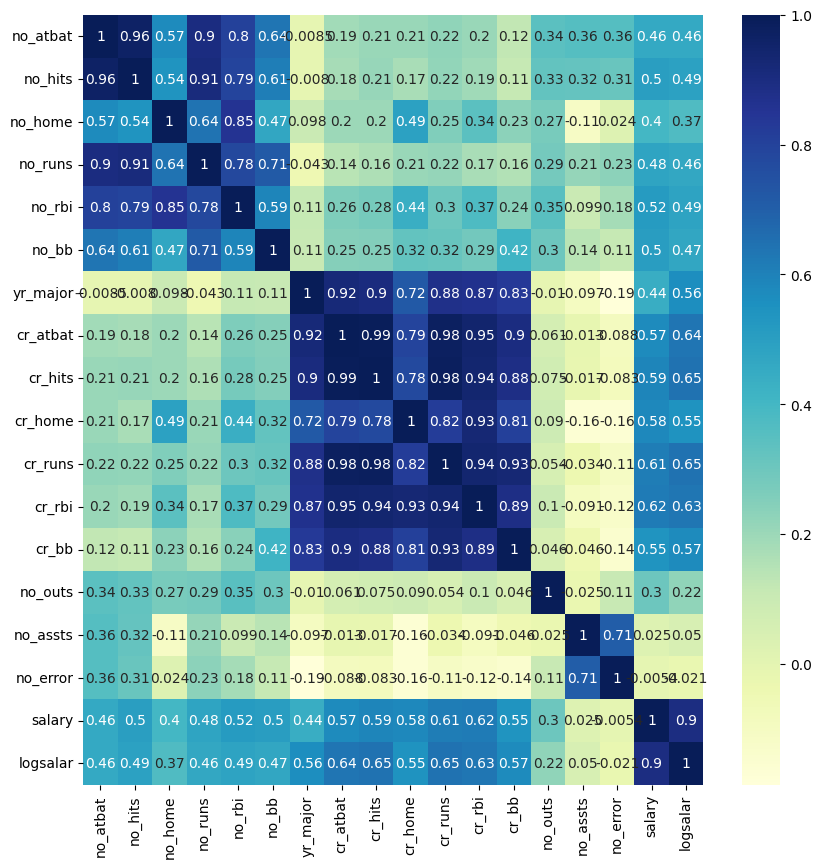

In [345]:
# create a correlation heatmap using sns
plt.figure(figsize=(10,10))
sns.heatmap(df_b_raw.corr(), annot=True, cmap="YlGnBu")
plt.show()


We have some highly correlated variables here:
*   no_hits is highly correlated with no_atbats, no_runs, and no_rbi
*   no_home is highly correlated with no_rbi
*   no_runs is highly correlated with no_atbats, no_rbi, and no_bb
*   no_rbi is highly correlated with no_hits, no_home
*   Career stats and yr_major are all highly correlated with each other
*   Salary and logsalar are highly correlated with each other, but Salary can be dropped since we have the logsalar, so we won't have to worry about this.

Between the 1986 stats and careers stats, here are some possible data transformations:

1. **On-base percentage (OBP)** is a baseball statistic that measures a player's ability to reach base safely (excluding fielding errors or other mistakes by the defensive team). It is calculated by dividing the sum of a player's hits, walks, and hit-by-pitches by the sum of their at-bats, walks, hit-by-pitches, and sacrifice flies. The formula for OBP is:

OBP = (Hits + Walks + Hit-by-Pitches) / (At-Bats + Walks + Hit-by-Pitches + Sacrifice Flies)

where:

Hits: the number of times a batter hits the ball safely and reaches base.
Walks: the number of times a batter is awarded first base by taking four balls outside the strike zone.
Hit-by-Pitches: the number of times a batter is struck by a pitch and awarded first base.
At-Bats: the number of times a batter completes a turn at bat (excluding walks, hit-by-pitches, sacrifices, and catcher's interference).
Sacrifice Flies: the number of times a batter hits a fly ball that results in a run being scored or a baserunner advancing, and the batter is subsequently out.
By calculating a player's OBP, we can evaluate how often a player gets on base relative to the number of opportunities they have had to do so.

2. **Batting average** is a baseball statistic that measures a player's performance at bat. It is calculated by dividing the number of hits a player gets by the number of at-bats they have. The formula for batting average is:

Batting Average = Hits / At-Bats

where:

Hits: the number of times a batter hits the ball safely and reaches base.
At-Bats: the number of times a batter completes a turn at bat (excluding walks, hit-by-pitches, sacrifices, and catcher's interference).
By calculating a player's batting average, we can evaluate how frequently a player gets a hit when they come to bat. It is often used as a measure of a player's overall hitting ability, although it has been criticized for not taking into account walks, which can also be valuable offensive contributions.

#### name

Counts and percentages of unique values in name:

                   Count  Percentage
Allanson, Andy         1    0.310559
Bush, Randy            1    0.310559
Tettleton, Mickey      1    0.310559
Scioscia, Mike         1    0.310559
Schmidt, Mike          1    0.310559
...                  ...         ...
Stubbs, Franklin       1    0.310559
Rayford, Floyd         1    0.310559
Lynn, Fred             1    0.310559
Whitt, Ernie           1    0.310559
Wilson, Willie         1    0.310559

[322 rows x 2 columns]


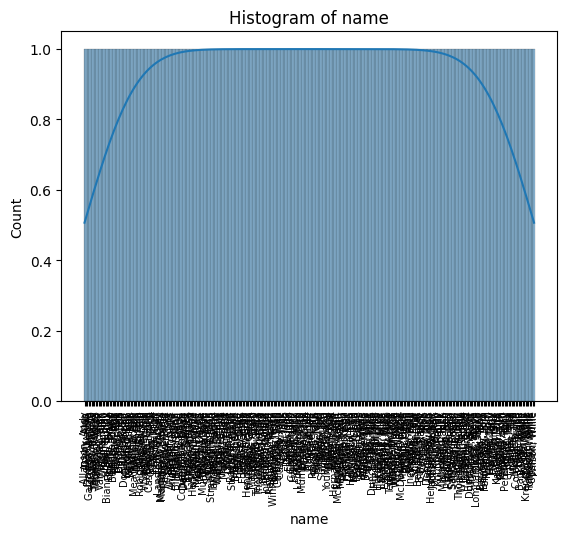

In [292]:
# explore the name in df_b_raw
data_exploration(df_b_raw, 'name') 
# we will drop this column since it is unique for each row and not useful for our model

#### team

Counts and percentages of unique values in team:

              Count  Percentage
NewYork          24    7.453416
Chicago          24    7.453416
Baltimore        15    4.658385
Montreal         14    4.347826
Milwaukee        14    4.347826
KansasCity       14    4.347826
SanFrancisco     14    4.347826
LosAngeles       14    4.347826
Minneapolis      13    4.037267
Texas            13    4.037267
California       13    4.037267
SanDiego         13    4.037267
Cincinnati       12    3.726708
Cleveland        12    3.726708
Detroit          12    3.726708
Oakland          12    3.726708
Seattle          12    3.726708
Philadelphia     12    3.726708
Houston          11    3.416149
Pittsburgh       11    3.416149
StLouis          11    3.416149
Atlanta          11    3.416149
Toronto          11    3.416149
Boston           10    3.105590


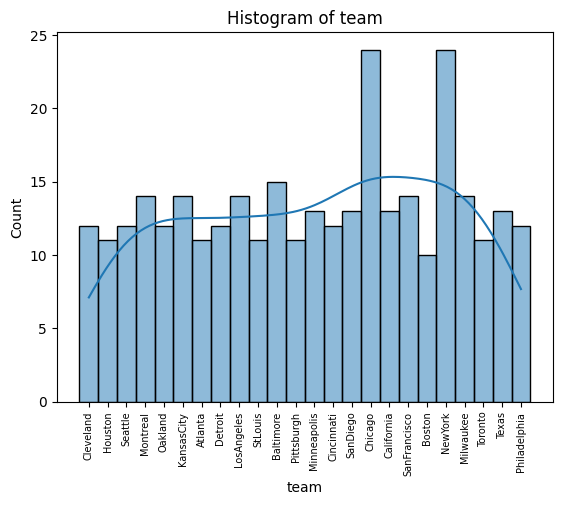

In [293]:
# explore the team in df_b_raw
data_exploration(df_b_raw, 'team')
# Most players come from New York or Chicago; most likely because they account for 2 team each
# New York = Yankees (AL) and Mets (NL)
# Chicago = White Sox (AL) and Cubs (NL)
# The data set only includes the city not the name of the Team.
# City names are spelled consistently with no variations, so we will not have to worry about standardizing city names.

#### league

Counts and percentages of unique values in league:

          Count  Percentage
American    175   54.347826
National    147   45.652174


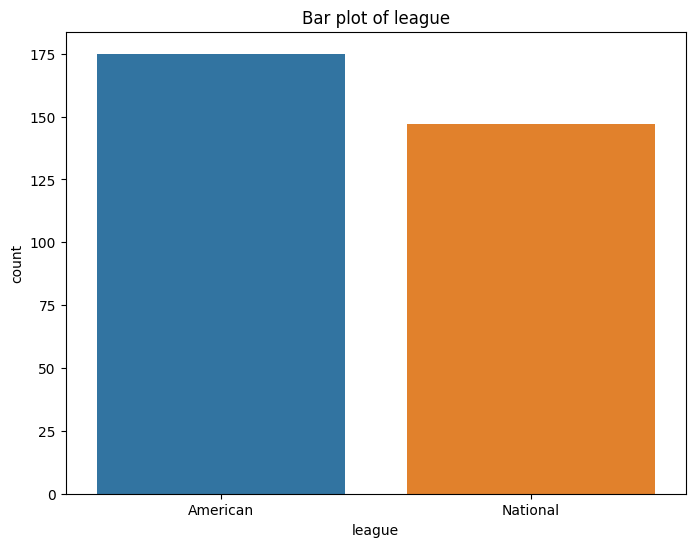

In [294]:
# explore the league in df_b_raw
data_exploration(df_b_raw, 'league')
# Most of the players play in the AL accounting for 54% (NL = 46%); the data is imbalanced.
# We can use binary encoding here.

#### division

Counts and percentages of unique values in division:

      Count  Percentage
West    165   51.242236
East    157   48.757764


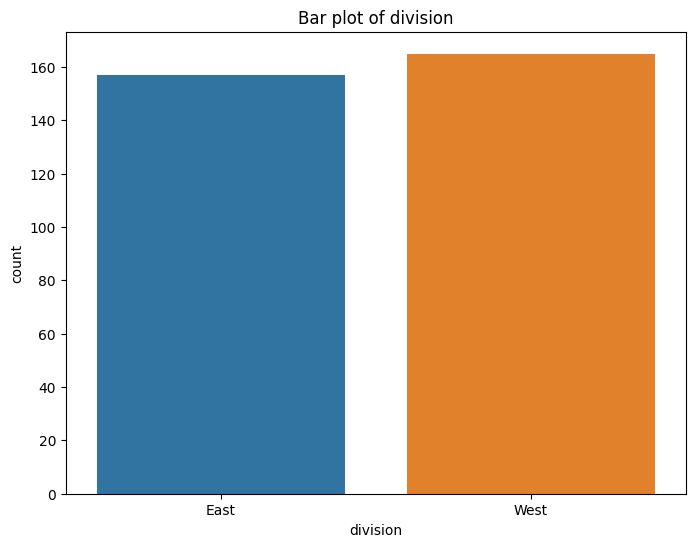

In [295]:
# explore the division in df_b_raw
data_exploration(df_b_raw, 'division')
# Most of the players play in th west division accounting for 51% (49% in East); there is a slight imbalance by about 2%.
# We can use binary encoding here.

#### position

Counts and percentages of unique values in position:

    Count  Percentage
C      40   12.422360
3B     32    9.937888
1B     31    9.627329
2B     31    9.627329
OF     30    9.316770
SS     30    9.316770
CF     26    8.074534
RF     26    8.074534
LF     25    7.763975
DH     16    4.968944
UT     14    4.347826
O1      4    1.242236
3S      3    0.931677
OS      2    0.621118
DO      2    0.621118
32      1    0.310559
S3      1    0.310559
1O      1    0.310559
CS      1    0.310559
OD      1    0.310559
CD      1    0.310559
3O      1    0.310559
23      1    0.310559
2S      1    0.310559
13      1    0.310559


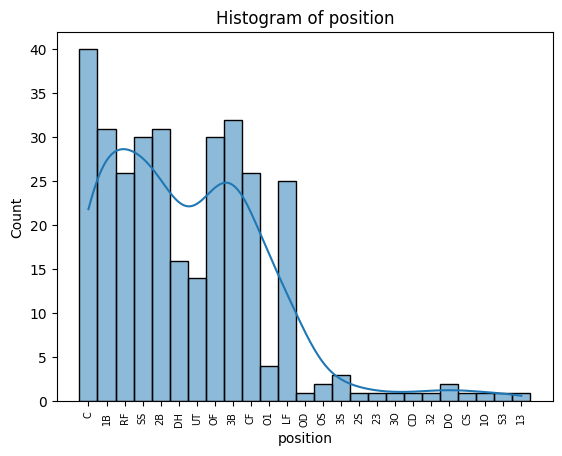

In [296]:
# explore the position in df_b_raw
data_exploration(df_b_raw, 'position')
# After "UT," there are some odd positions abbreviations. We will either have to look these players up to verify/update their position played in 1986.
# We might be able to do some encoding by position number.

- "C" stands for Catcher.
- "1B" stands for First Base.
- "2B" stands for Second Base.
- "3B" stands for Third Base.
- "SS" stands for Shortstop.
- "LF" stands for Left Field.
- "CF" stands for Center Field.
- "RF" stands for Right Field.
- "OF" stands for Outfield (a general position that could include LF, CF, RF).
- "DH" stands for Designated Hitter.
- "UT" stands for Utility (a player capable of playing in several different positions).

The minor categories are those who have two positions. We will need to create dummy variables for these, e.g. one-hot encoding.

#### no_atbat

Mean of no_atbat: 390.07
Standard deviation of no_atbat: 143.60
Number of outliers in no_atbat: 0
Outliers values:
[]


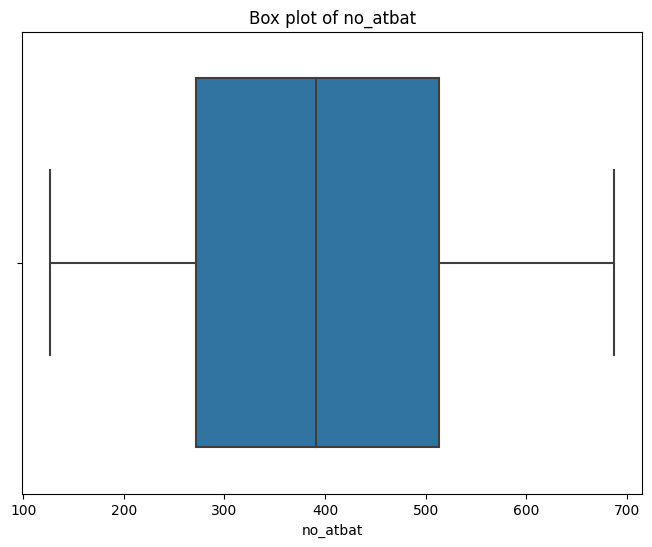

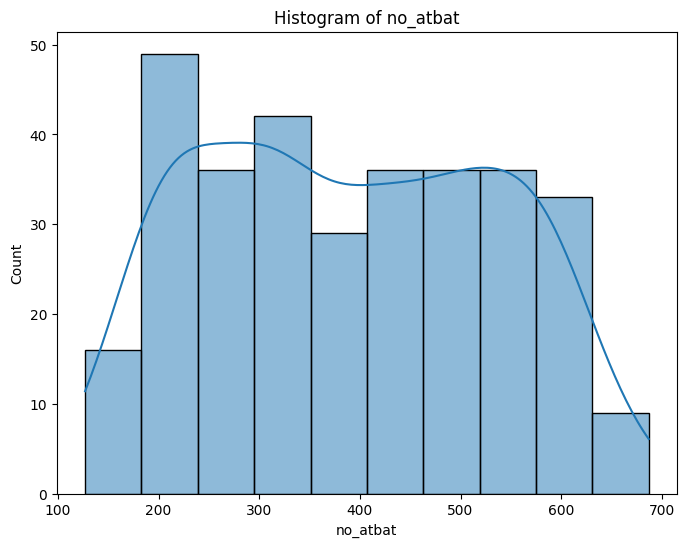

In [297]:
# explore the no_atbat in df_b_raw
data_exploration(df_b_raw, 'no_atbat')

# Most at bats fell between about 200-600 in 1986.
# MIN = 127
# MAX = 687
# No ouliers
# Almost normally distributed

#### no_hits

Mean of no_hits: 103.40
Standard deviation of no_hits: 44.18
Number of outliers in no_hits: 0
Outliers values:
[]


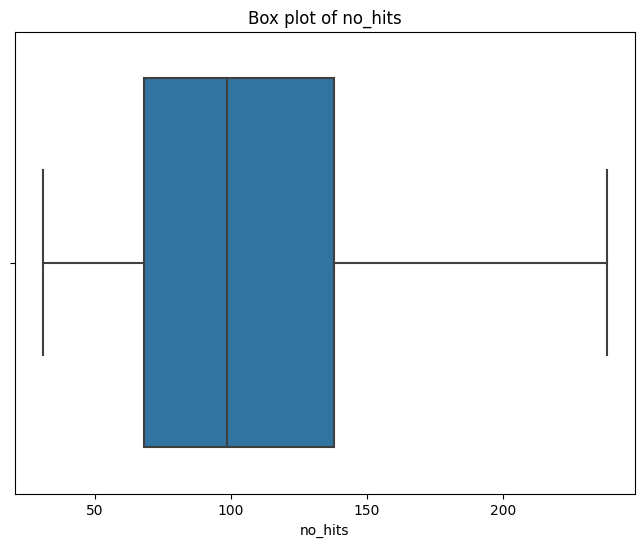

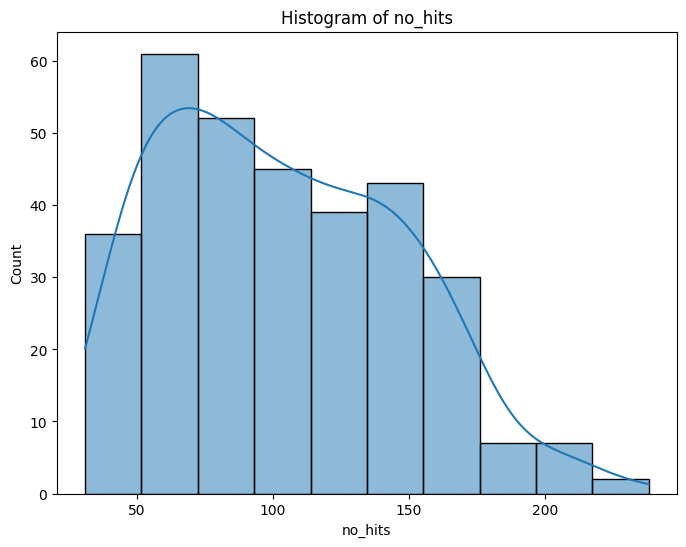

In [298]:
# explore the no_hits in df_b_raw
data_exploration(df_b_raw, 'no_hits')

# For 1986, the number of hits fell between 50-150
# Data is left (positively) skewed, so we may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data.
# No outliers
# MIN = 31
# MAX = 238

#### no_home

Mean of no_home: 11.10
Standard deviation of no_home: 8.70
Number of outliers in no_home: 3
Outliers values:
[35 40 37]


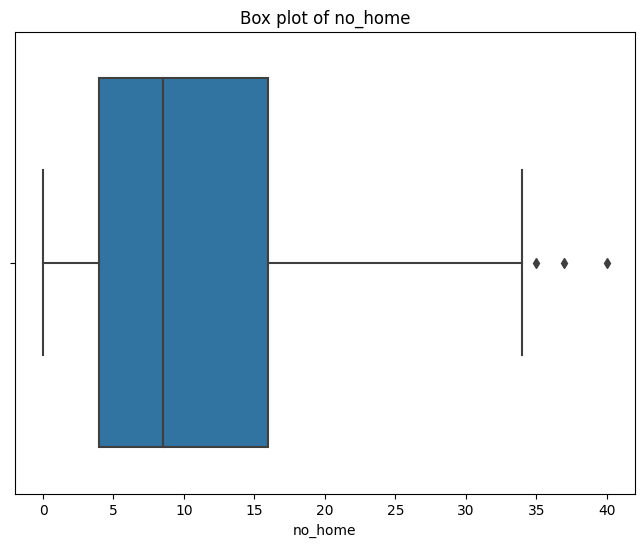

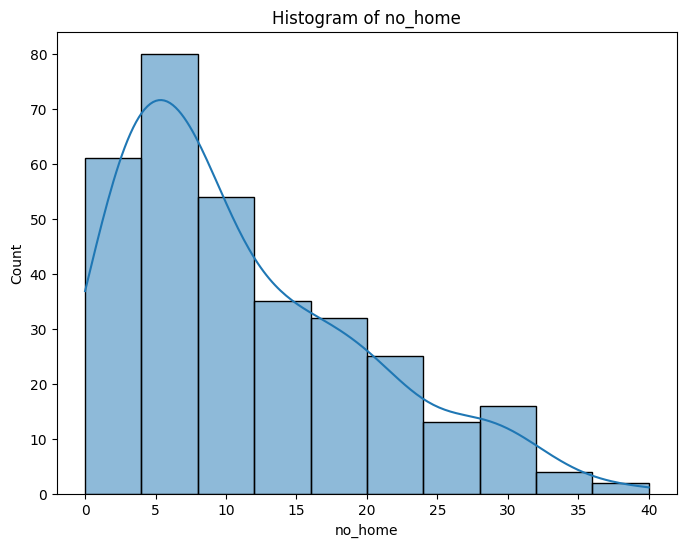

In [299]:
# explore the no_home in df_b_raw
data_exploration(df_b_raw, 'no_home')

# In 1986, total home runs fell between 0-20;
# Data is positively skewed, and there are 3 outliers = 35, 37, 40
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 0
# MAX = 40

#### no_runs

Mean of no_runs: 52.22
Standard deviation of no_runs: 25.06
Number of outliers in no_runs: 1
Outliers values:
[130]


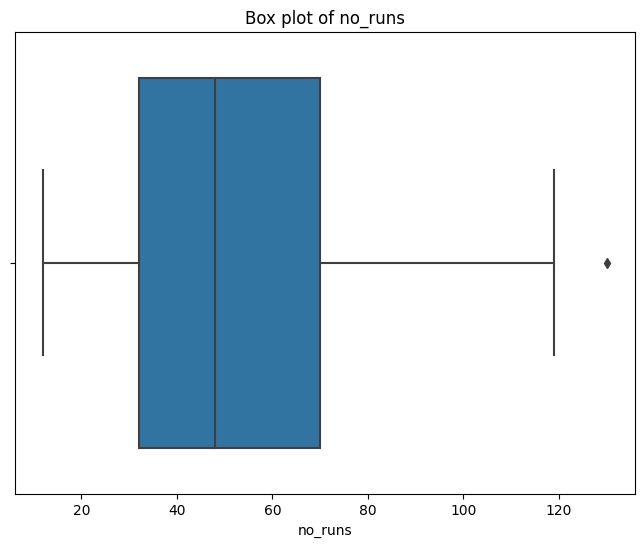

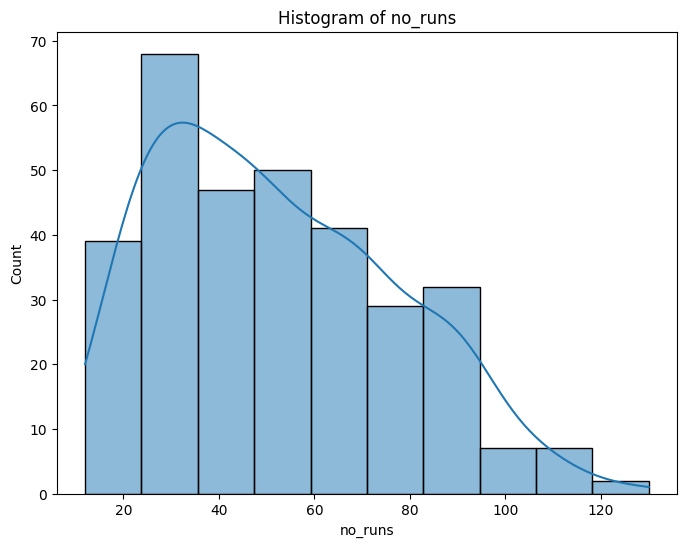

In [300]:
# explore the no_runs in df_b_raw
data_exploration(df_b_raw, 'no_runs')

# In 1986, most runs fell between 20-80 total runs.
# Data is positively skewed with 1 outlier = 130
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 12
# MAX = 130

#### no_rbi

Mean of no_rbi: 49.37
Standard deviation of no_rbi: 25.50
Number of outliers in no_rbi: 1
Outliers values:
[121]


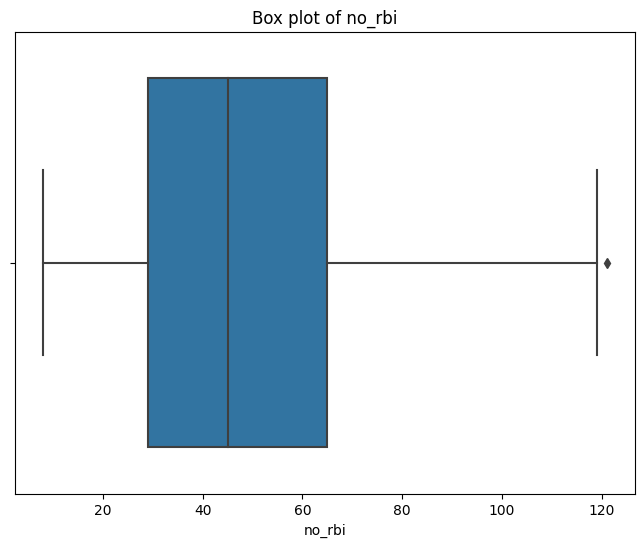

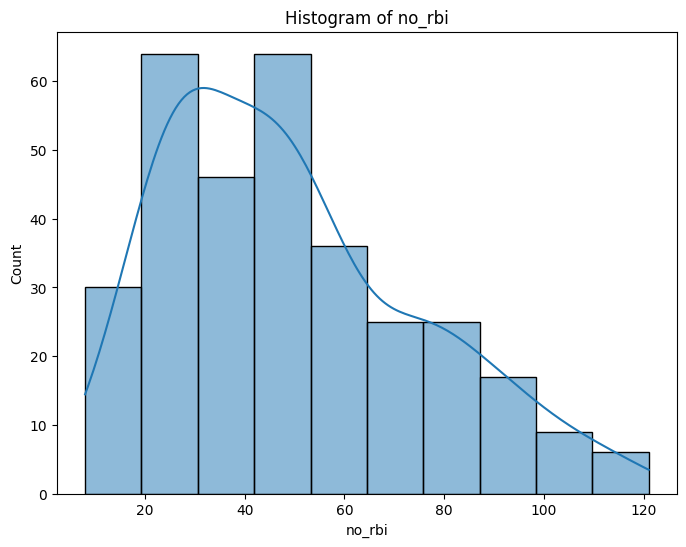

In [302]:
# explore the no_rbi in df_b_raw
data_exploration(df_b_raw, 'no_rbi')

# In 1986, most feel between 20-80 RBIs
# Data is positively skewed with 1 outlier = 121
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 8
# MAX = 121

#### no_bb

Mean of no_bb: 39.86
Standard deviation of no_bb: 21.10
Number of outliers in no_bb: 1
Outliers values:
[105]


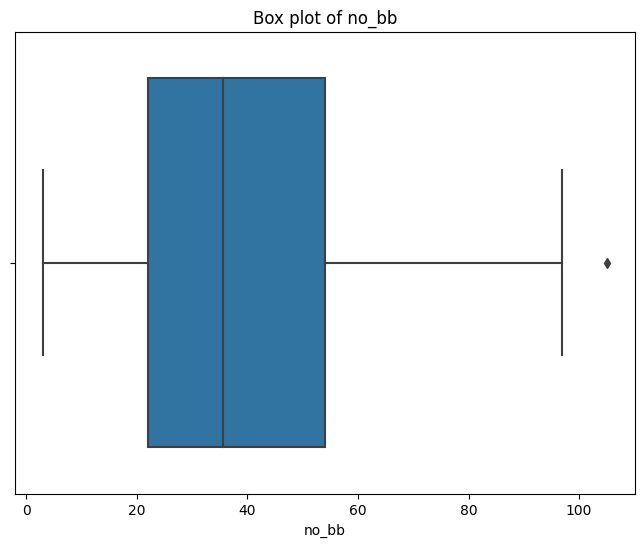

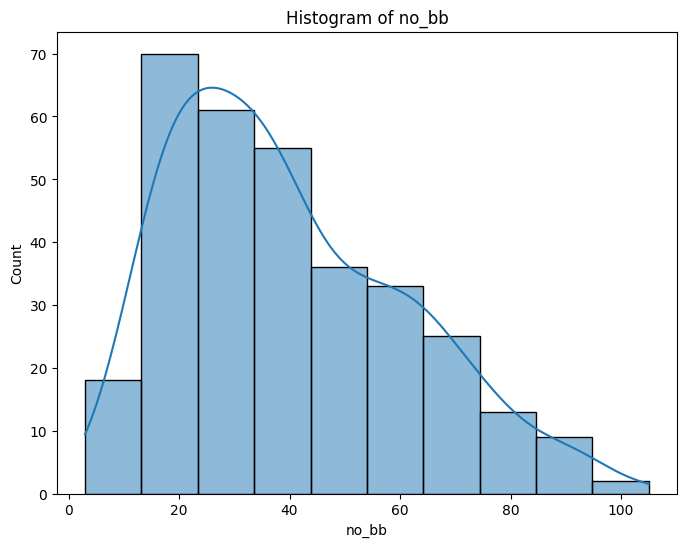

In [303]:
# explore the no_bb in df_b_raw
data_exploration(df_b_raw, 'no_bb')

# Most fell between 20-60 total walks in 1986
# Data is positively skewed with 1 outlier = 105
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 3
# MAX = 105

#### yr_major

Mean of yr_major: 7.68
Standard deviation of yr_major: 4.97
Number of outliers in yr_major: 2
Outliers values:
[24 23]


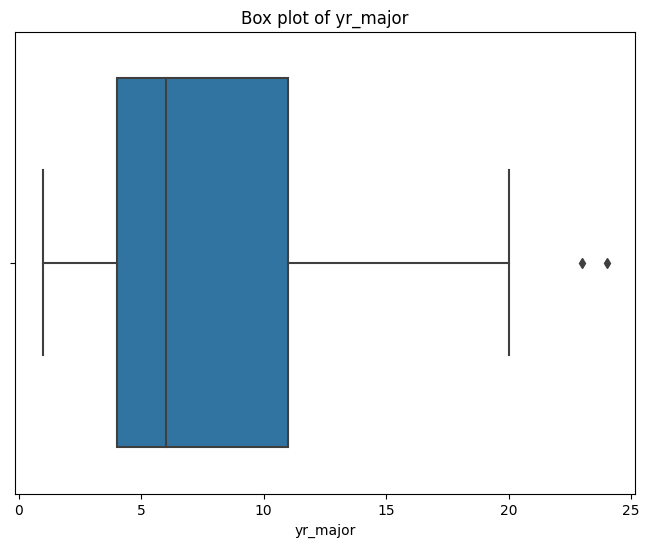

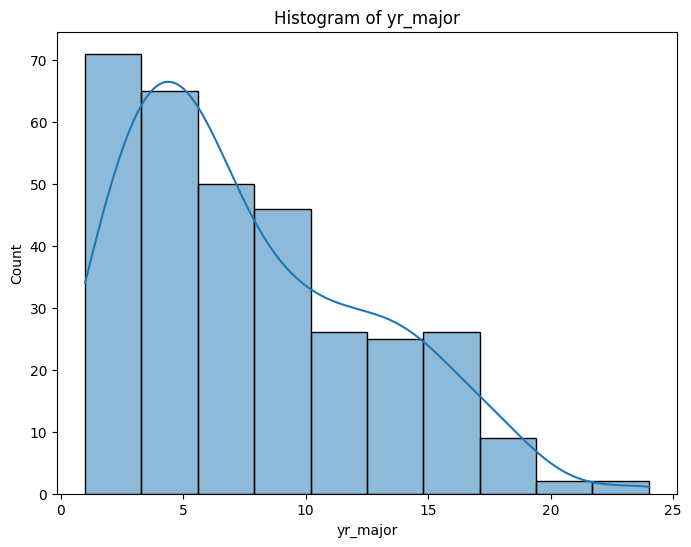

In [305]:
# explore ye_major in df_b_raw
data_exploration(df_b_raw, 'yr_major')

# MOst played between 0-15 years
# Data is positively skewed with 2 outliers = 23, 24
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 1
# MAX = 24

#### cr_atbat

Mean of cr_atbat: 2763.08
Standard deviation of cr_atbat: 2328.48
Number of outliers in cr_atbat: 3
Outliers values:
[14053  9528  9778]


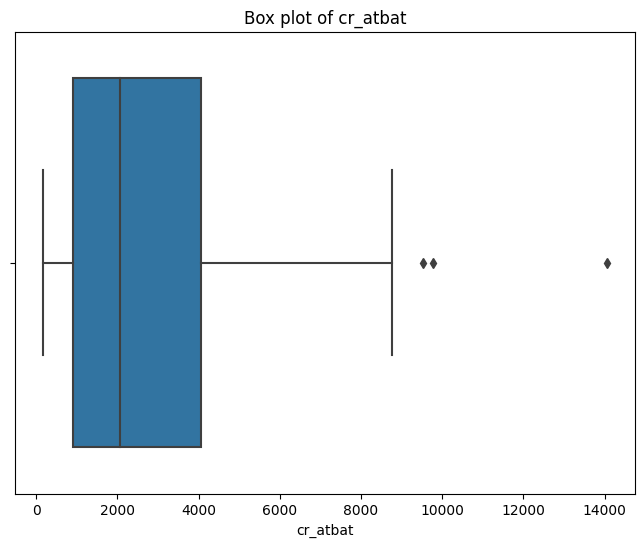

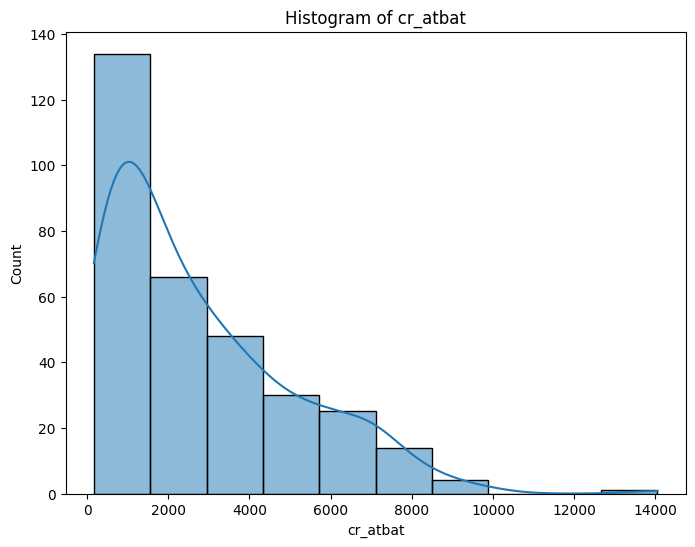

In [306]:
# explore the cr_atbat in df_b_raw
data_exploration(df_b_raw, 'cr_atbat')

# Most players fell between 0-4000 career at-bats
# Data is positively skewed with 3 outliers = 9528, 9778, 14053
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 166
# MAX = 14053

#### cr_hits

Mean of cr_hits: 747.69
Standard deviation of cr_hits: 654.79
Number of outliers in cr_hits: 6
Outliers values:
[2464 4256 2510 2583 2732 2402]


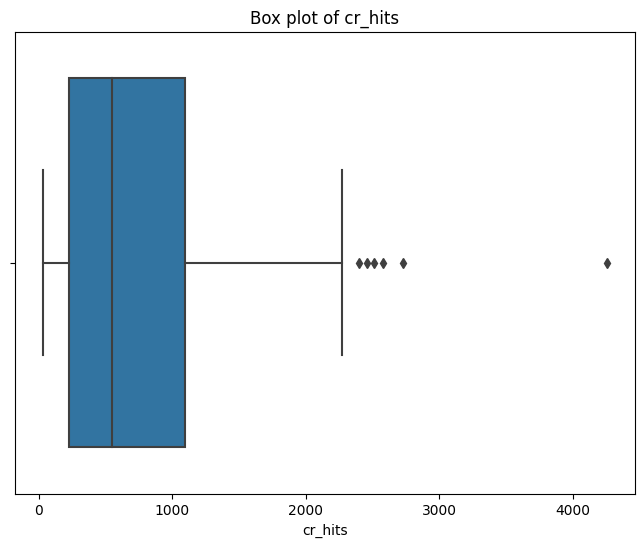

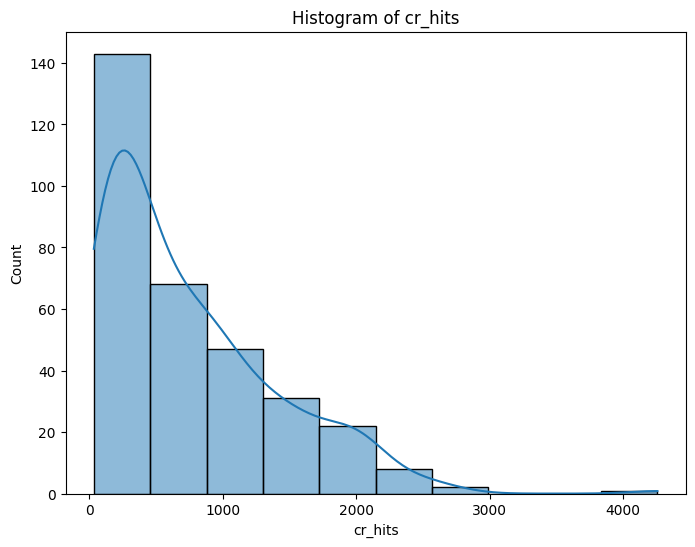

In [307]:
# explore the cr_hits in df_b_raw
data_exploration(df_b_raw, 'cr_hits')

# Most players fell between 0 and 1000+ career hits
# Data is positively skewed with 6 outliers = [2464 4256 2510 2583 2732 2402]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 34
# MAX = 4256

#### cr_home

Mean of cr_home: 74.09
Standard deviation of cr_home: 90.07
Number of outliers in cr_home: 32
Outliers values:
[225 253 224 215 235 235 281 242 315 221 347 291 442 266 247 305 275 241
 271 348 259 231 384 268 351 495 312 548 271 224 379 242]


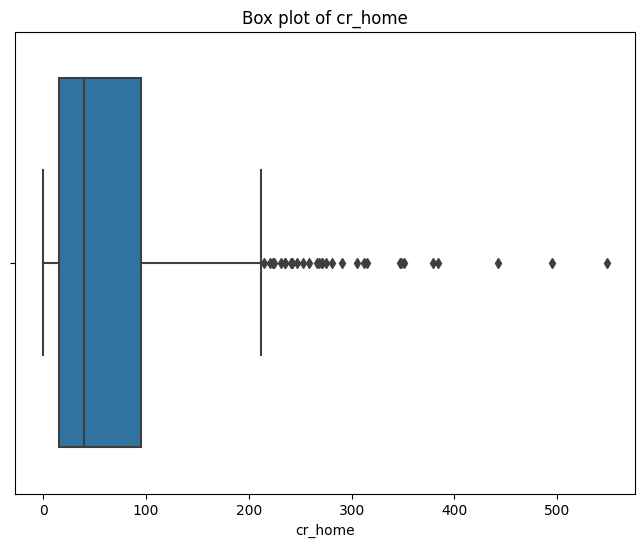

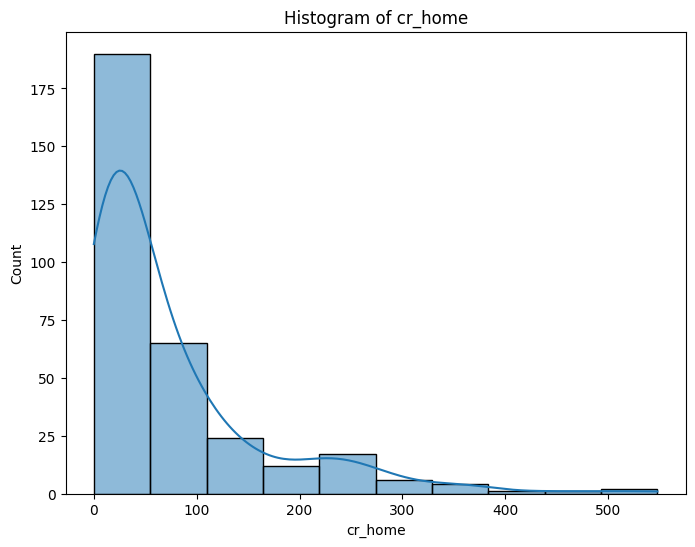

In [308]:
# explore the cr_home in df_b_raw
data_exploration(df_b_raw, 'cr_home')

# Most players fell between 0 and 100 career homers
# Data is positively skewed
# 32 outliers = [225 253 224 215 235 235 281 242 315 221 347 291 442 266 247 305 275 241 271 348 259 231 384 268 351 495 312 548 271 224 379 242]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 0
# MAX = 548

#### cr_runs

Mean of cr_runs: 374.29
Standard deviation of cr_runs: 336.43
Number of outliers in cr_runs: 4
Outliers values:
[1347 2165 1509 1272]


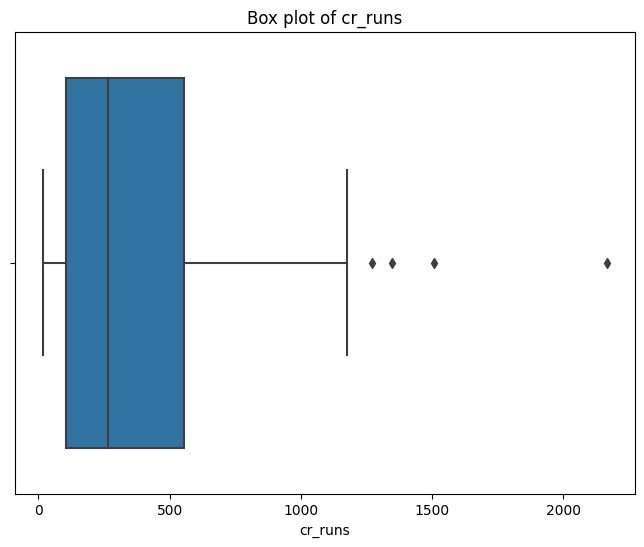

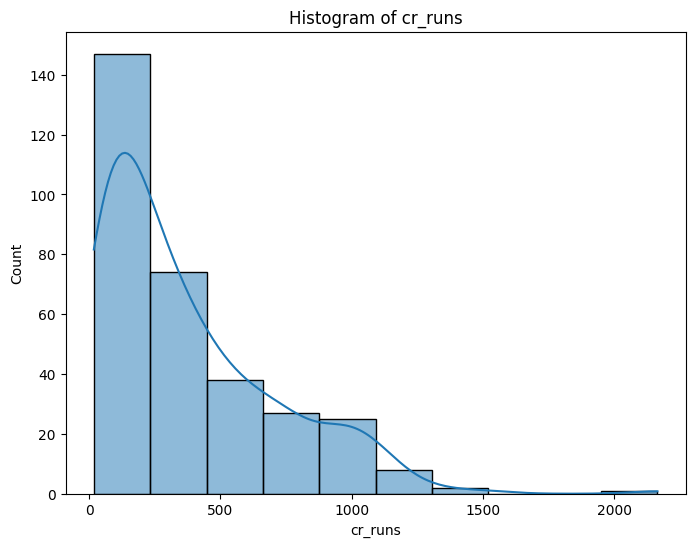

In [309]:
# explore the cr_runs in df_b_raw
data_exploration(df_b_raw, 'cr_runs')

# Most players fell between 0 and roughly over 500 career runs
# Data is positively skewed with 4 outliers = [1347 2165 1509 1272]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 18
# MAX = 2165

#### cr_rbi

Mean of cr_rbi: 347.61
Standard deviation of cr_rbi: 338.79
Number of outliers in cr_rbi: 23
Outliers values:
[1072 1089 1013 1179 1152 1210 1093 1234 1015 1050 1239 1067 1267 1088
 1032 1289 1392 1314 1128 1659 1299 1652 1348]


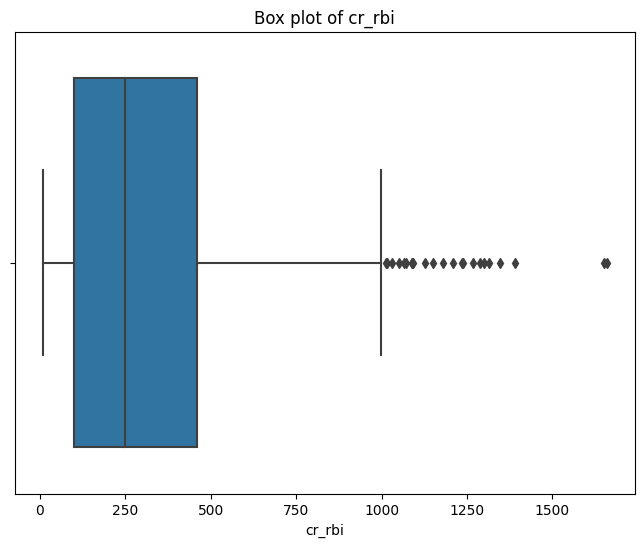

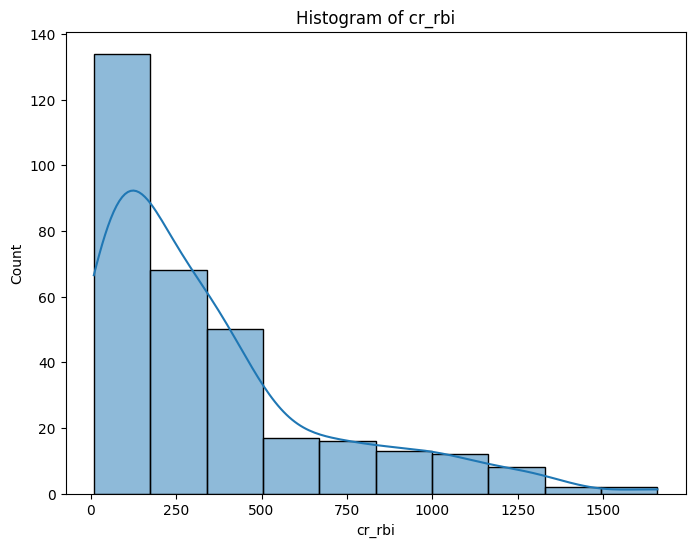

In [310]:
# explore the cr_rbi in df_b_raw
data_exploration(df_b_raw, 'cr_rbi')

# Most players fell between 0 and 500 career RBIs
# Data is positively skewed with 23 outliers = [1072 1089 1013 1179 1152 1210 1093 1234 1015 1050 1239 1067 1267 1088 1032 1289 1392 1314 1128 1659 1299 1652 1348]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 9
# MAX = 1659

#### cr_bb

Mean of cr_bb: 273.39
Standard deviation of cr_bb: 273.63
Number of outliers in cr_bb: 18
Outliers values:
[ 866 1087 1380  989  820  875  921 1057  854  917 1354 1566  990 1342
 1153  925  819  875]


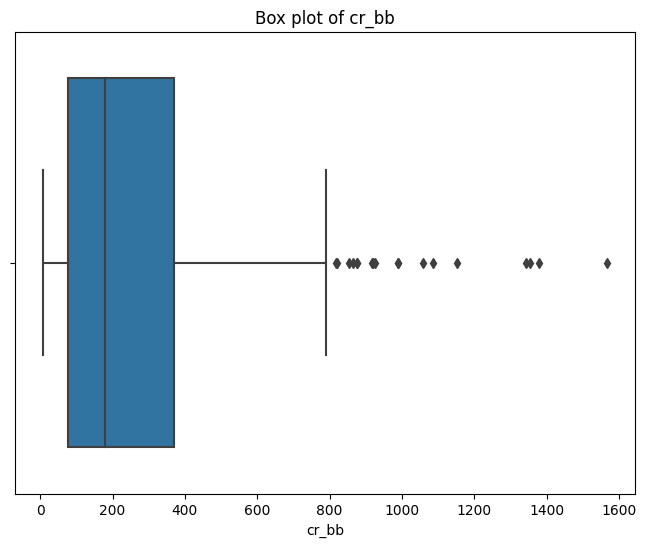

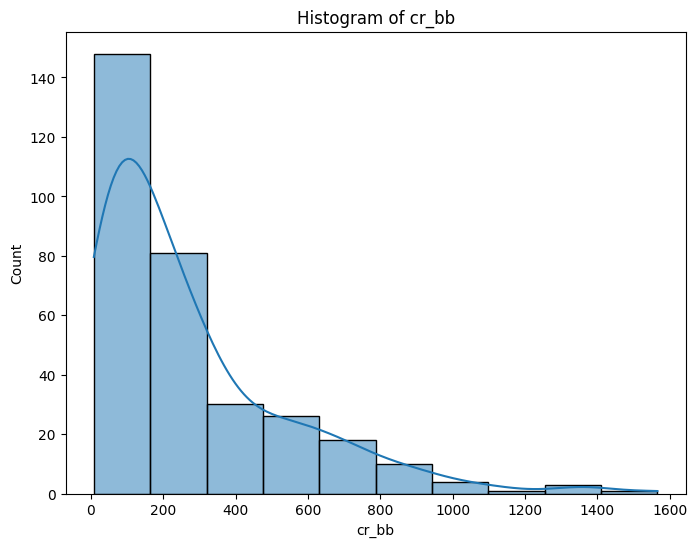

In [311]:
# explore the cr_bb in df_b_raw
data_exploration(df_b_raw, 'cr_bb')

# Most players fell between 0 and 400 career walks
# Data is positively skewed with 18 outliers = [ 866 1087 1380  989  820  875  921 1057  854  917 1354 1566  990 1342 1153  925  819  875]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 8
# MAX = 1566

#### no_outs

Mean of no_outs: 288.99
Standard deviation of no_outs: 280.66
Number of outliers in no_outs: 36
Outliers values:
[ 880  805  912  812 1067  732 1378  697  808 1377 1045  709  726  869
 1253  670  885  686 1199 1218 1231  756  682 1224  846  659  866 1236
 1320 1160  692  810 1182  942 1222 1314]


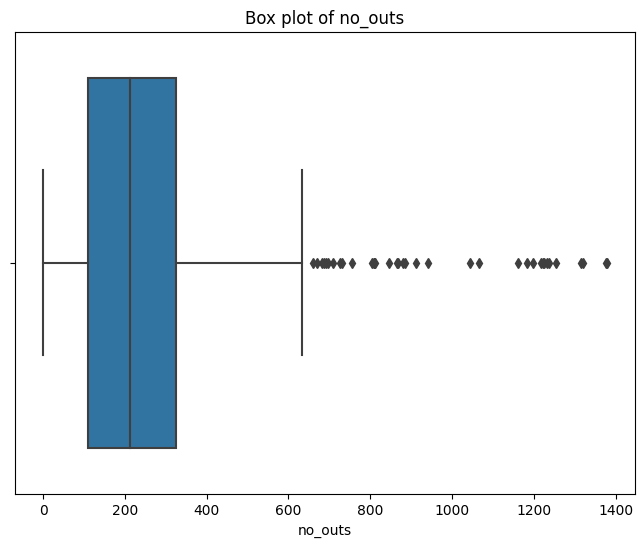

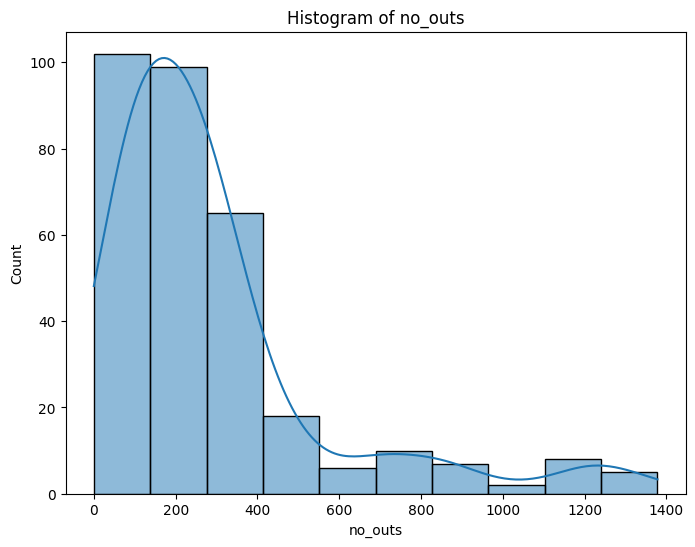

In [312]:
# explore the no_outs in df_b_raw
data_exploration(df_b_raw, 'no_outs')

# Most players were thrown out roughly between 0 and 400 times in 1986
# Data is positively skewed
# 36 outlier = [ 880  805  912  812 1067  732 1378  697  808 1377 1045  709  726  869 1253  670  885  686 1199 1218 1231  756  682 1224  846  659  866 1236 1320 1160  692  810 1182  942 1222 1314]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 0
# MAX = 1378


#### no_assts

Mean of no_assts: 106.92
Standard deviation of no_assts: 136.85
Number of outliers in no_assts: 23
Outliers values:
[421 445 482 439 487 415 479 440 444 421 450 459 453 475 492 450 465 406
 407 432 442 445 414]


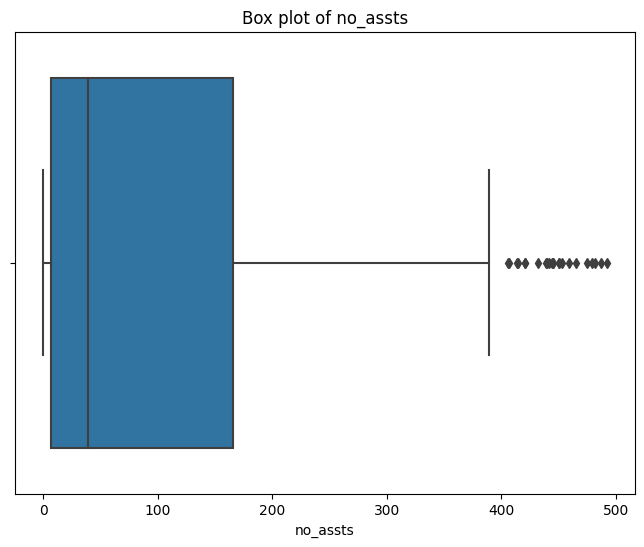

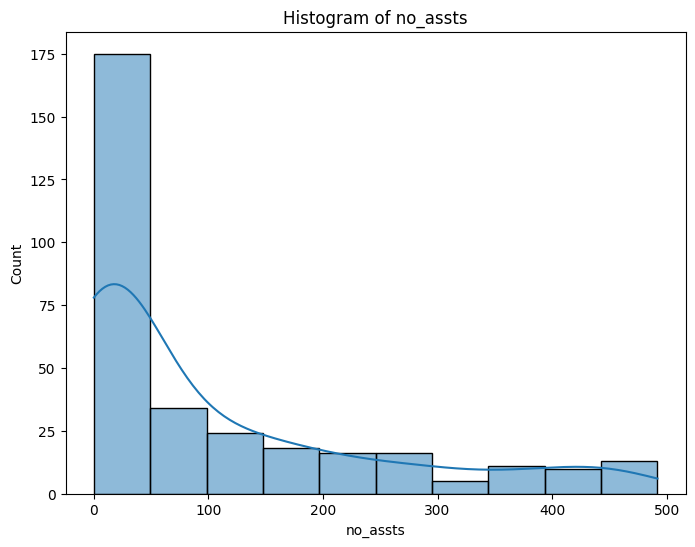

In [313]:
# explore no_assts in df_b_raw
data_exploration(df_b_raw, 'no_assts')

# In 1986, most players fell roughly between 0 and 200 assists
# Data is positively skewed with 23 outliers = [421 445 482 439 487 415 479 440 444 421 450 459 453 475 492 450 465 406 407 432 442 445 414]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 0
# MAX = 492

#### no_error

Mean of no_error: 8.04
Standard deviation of no_error: 6.37
Number of outliers in no_error: 9
Outliers values:
[25 25 24 26 26 25 25 29 32]


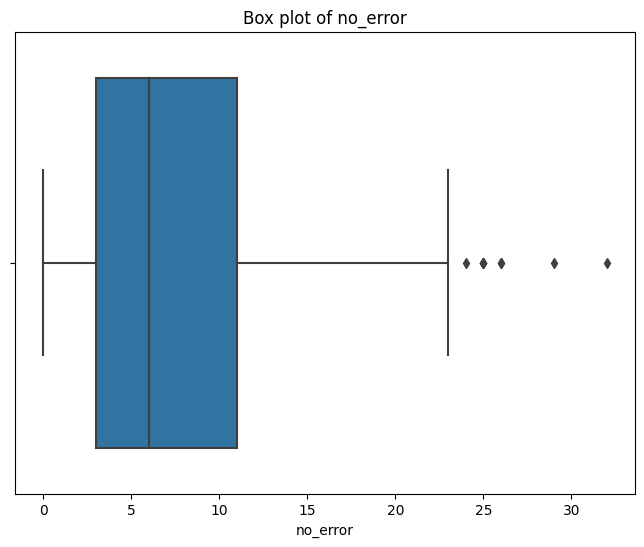

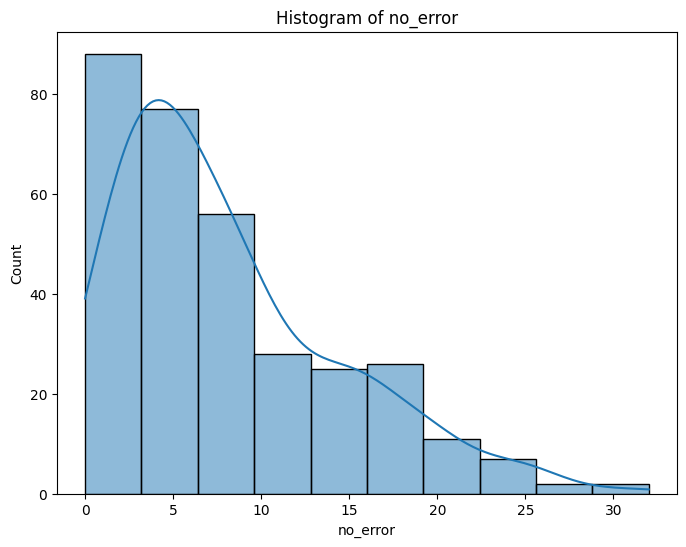

In [314]:
# explore the no_error in df_b_raw
data_exploration(df_b_raw, 'no_error')

# In 1986, most players fell roughly between 0 and 15 errors
# Data is positively skewed with 9 outliers = [25 25 24 26 26 25 25 29 32]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 0
# MAX = 32

#### salary

Mean of salary: 535.93
Standard deviation of salary: 451.12
Number of outliers in salary: 11
Outliers values:
[1975.    1900.    1861.46  2460.    1925.571 2412.5   1800.    2127.333
 1940.    1670.    1600.   ]


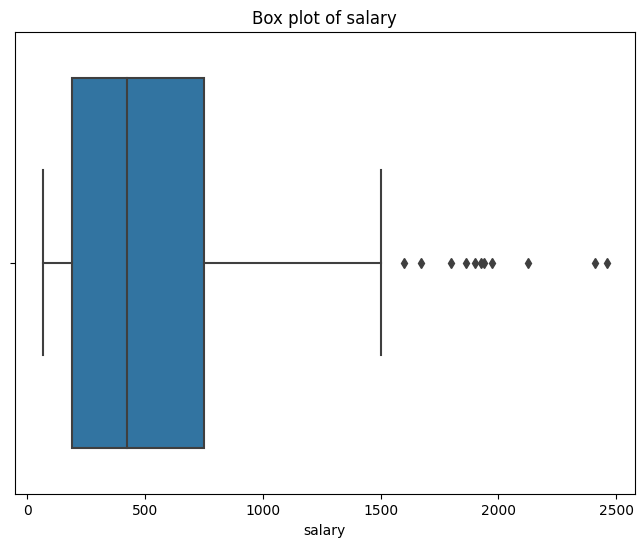

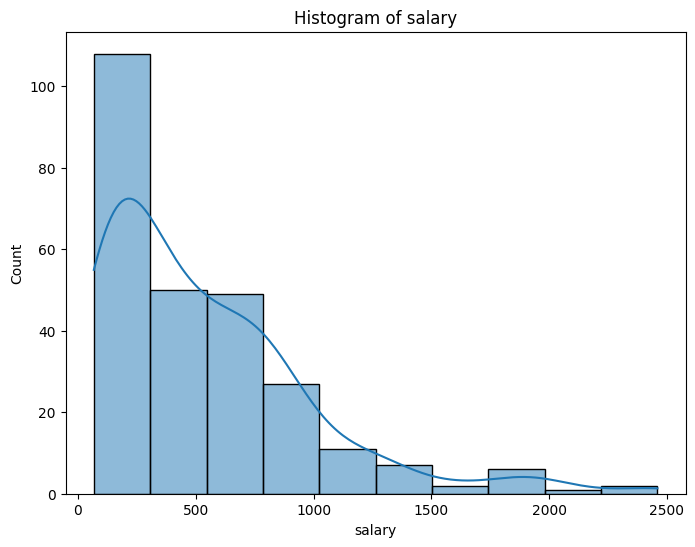

In [315]:
# explore the salary in df_b_raw
data_exploration(df_b_raw, 'salary')

# In 1987, most player salaries fell roughly between $125 and $750 thousand
# Data is positively skewed with 11 outliers = [1975.    1900.    1861.46  2460.    1925.571 2412.5   1800.    2127.333 1940.    1670.    1600.   ]
# MIN = 67.50
# MAX = 2460.00
# We can confirm here that we are predicting for 1987
# We can drop this variable since we have the log of the salary.

#### logsalar

Mean of logsalar: 5.93
Standard deviation of logsalar: 0.89
Number of outliers in logsalar: 0
Outliers values:
[]


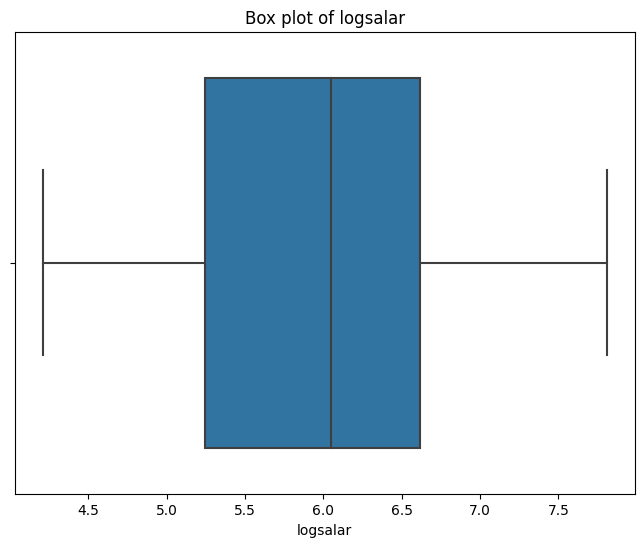

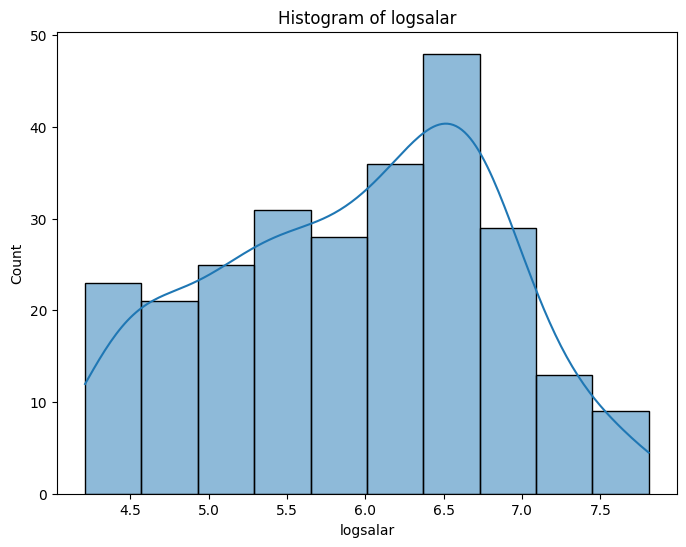

In [317]:
# explore the logsalar in df_b_raw
data_exploration(df_b_raw, 'logsalar')

# In 1987, most player log salaries fell roughly between 5.0 and 7.0
# The data is slightly normally distributed with 0 outliers
# MIN = 4.21
# MAX = 7.81

#### check the missing values

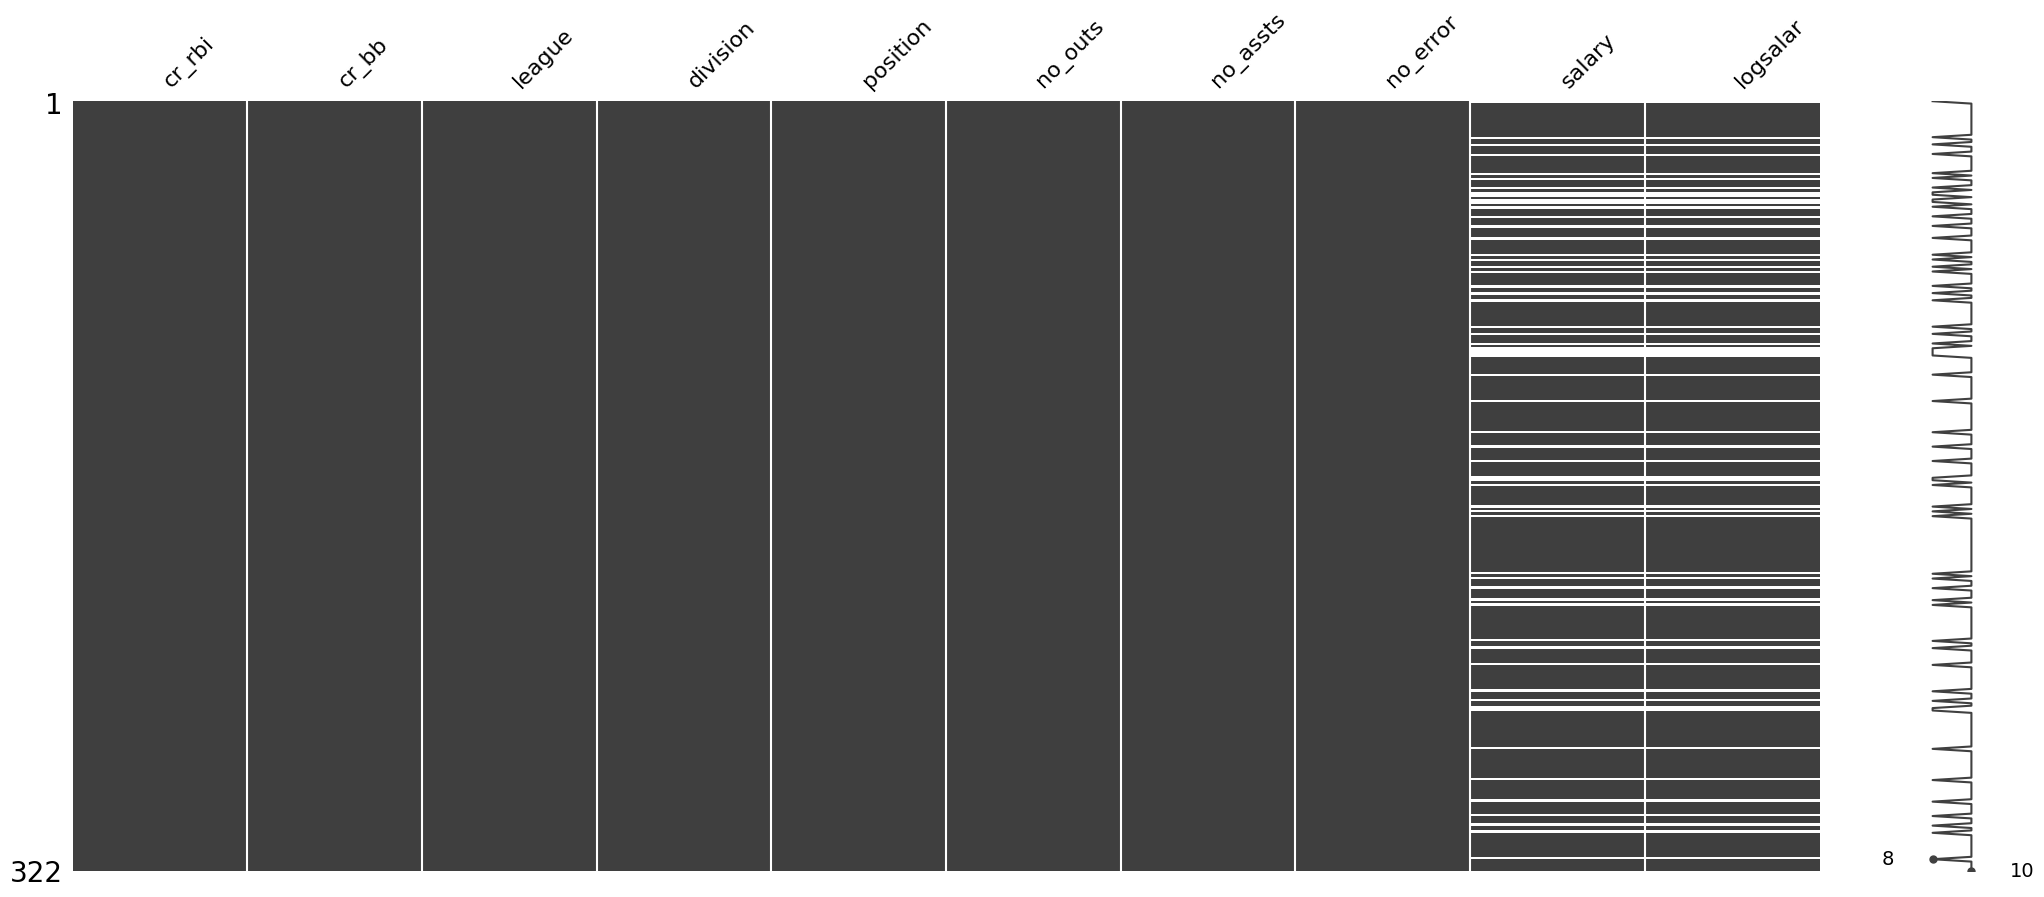

In [323]:
msno.matrix(df_b_raw.iloc[:, -10:])
plt.show()

# Since the logsalar is just the log of the salary, 
# we can expect both variables to be missing data from the same records.

# It seems that the missing data is missing at random.

### Upon completing the data understanding, here is a our Data Preparation Plan:
1. Because it's a unique variables, drop the player name because its is useless to us.
2. Do some data cleansing with the positions variable; for those odd position abbrevations, perhaps do some position groupings or relabel?
3. If we consider a neural networks model, we'll have to normalize the entire dataset.
4. We can drop the salary variable since we have logsalar.
5. We'll have to do input the logsalar variable using random forest imputation.

### Modeling Plan:
Some of the interval variables are skewed and some also have outliers, so we'll have to consider modeling techniques that are not sensitive to skewed data and outliers such as decision tree or random forest.

***Something to keep in mind***:

The Correlations Analysis shows some high correlated variables. This might impact modeling; thus, if we are seeing poor performance during modeling, we may need to address this.

## Data Preparation

### Select Data

#### Drop the useless variables

In [337]:
df_b_pos = df_b_raw.copy()

# drop the salary variable
df_b_pos.drop(columns = ['salary'], inplace = True)

# drop the name variable
df_b_pos.drop(columns = ['name'], inplace = True)


In [338]:
df_b_pos.head()

,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,logsalar
0,Cleveland,293,66,1,30,29,14,1,293,66,1,30,29,14,American,East,C,446,33,20,NaN
1,Houston,315,81,7,24,38,39,14,3449,835,69,321,414,375,National,West,C,632,43,10,6.163315
2,Seattle,479,130,18,66,72,76,3,1624,457,63,224,266,263,American,West,1B,880,82,14,6.173786
3,Montreal,496,141,20,65,78,37,11,5628,1575,225,828,838,354,National,East,RF,200,11,3,6.214608
4,Montreal,321,87,10,39,42,30,2,396,101,12,48,46,33,National,East,1B,805,40,4,4.516339


### Format Data

#### Binary Encoding

In [339]:
# Binary Encoding for the league and division variables

# binary encode the league variable
df_b_pos = pd.get_dummies(df_b_pos, columns = ['league'])

# binary encode the division variable
df_b_pos = pd.get_dummies(df_b_pos, columns = ['division'])

# check the two new variables
df_b_pos.head()

,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,position,no_outs,no_assts,no_error,logsalar,league_American,league_National,division_East,division_West
0,Cleveland,293,66,1,30,29,14,1,293,66,1,30,29,14,C,446,33,20,NaN,1,0,1,0
1,Houston,315,81,7,24,38,39,14,3449,835,69,321,414,375,C,632,43,10,6.163315,0,1,0,1
2,Seattle,479,130,18,66,72,76,3,1624,457,63,224,266,263,1B,880,82,14,6.173786,1,0,0,1
3,Montreal,496,141,20,65,78,37,11,5628,1575,225,828,838,354,RF,200,11,3,6.214608,0,1,1,0
4,Montreal,321,87,10,39,42,30,2,396,101,12,48,46,33,1B,805,40,4,4.516339,0,1,1,0


#### One-Hot Encoding

In [340]:
# one-hot encoding for the team variable
df_b_pos = pd.get_dummies(df_b_pos, columns = ['team'])

# check the new variables
display(df_b_pos.head(), df_b_pos.shape)

,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,position,no_outs,no_assts,no_error,logsalar,league_American,league_National,division_East,division_West,team_Atlanta,team_Baltimore,team_Boston,team_California,team_Chicago,team_Cincinnati,team_Cleveland,team_Detroit,team_Houston,team_KansasCity,team_LosAngeles,team_Milwaukee,team_Minneapolis,team_Montreal,team_NewYork,team_Oakland,team_Philadelphia,team_Pittsburgh,team_SanDiego,team_SanFrancisco,team_Seattle,team_StLouis,team_Texas,team_Toronto
0,293,66,1,30,29,14,1,293,66,1,30,29,14,C,446,33,20,NaN,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,C,632,43,10,6.163315,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1B,880,82,14,6.173786,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,RF,200,11,3,6.214608,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1B,805,40,4,4.516339,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


(322, 46)

In [341]:
# one-hot encoding for the position variable

# Create a list of the basic positions
basic_positions = ['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'OF', 'DH', 'UT']

# Map the special positions to their corresponding basic positions
position_mapping = {
    "O1": ["OF", "1B"],
    "3S": ["3B", "SS"],
    "OS": ["OF", "SS"],
    "DO": ["DH", "OF"],
    "32": ["3B", "2B"],
    "S3": ["SS", "3B"],
    "1O": ["1B", "OF"],
    "CS": ["CF", "3B"], # CS is a special case, it actually means CF and 3B based on the research
    "OD": ["OF", "DH"],
    "CD": ["CF", "DH"],
    "3O": ["3B", "OF"],
    "23": ["2B", "3B"],
    "2S": ["2B", "SS"],
    "13": ["1B", "3B"]
}

# Copy the position column
df_b_pos['position_copy'] = df_b_pos['position']

# If the position is a special one, replace it with the first corresponding basic position
def replace_special_positions(pos):
    if pos in position_mapping:
        return position_mapping[pos][0]
    return pos

df_b_pos['position_copy'] = df_b_pos['position_copy'].apply(replace_special_positions)

# Generate one-hot encoding for the basic positions
df_b_pos = pd.get_dummies(df_b_pos, columns=['position_copy'], prefix='position')

# Manually adjust the one-hot encoding for the special positions
for index, row in df_b_pos.iterrows():
    if row['position'] in position_mapping:
        for pos in position_mapping[row['position']][1:]:
            df_b_pos.at[index, f'position_{pos}'] = 1

# Now we can drop the original 'position' column
df_b_pos = df_b_pos.drop('position', axis=1)


In [343]:
display(df_b_pos.head(), df_b_pos.shape)

,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,no_outs,no_assts,no_error,logsalar,league_American,league_National,division_East,division_West,team_Atlanta,team_Baltimore,team_Boston,team_California,team_Chicago,team_Cincinnati,team_Cleveland,team_Detroit,team_Houston,team_KansasCity,team_LosAngeles,team_Milwaukee,team_Minneapolis,team_Montreal,team_NewYork,team_Oakland,team_Philadelphia,team_Pittsburgh,team_SanDiego,team_SanFrancisco,team_Seattle,team_StLouis,team_Texas,team_Toronto,position_1B,position_2B,position_3B,position_C,position_CF,position_DH,position_LF,position_OF,position_RF,position_SS,position_UT
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


(322, 56)

### Clean Data

#### Missing Values Imputation with MissForest

Since the logsalar variable has 18% missing values, we'll have to impute these values. We'll use the MissForest package to do this.
Due to the updated sklearn package, we'll have to install the older version of sklearn to use the MissForest package.

In [344]:
# save the df_b_pos dataframe as a csv file to perform MissForest imputation in other notebook, due to package issues
# df_b_pos.to_csv('df_b_pos.csv', index = False) 

# import sklearn.neighbors._base
# import sys
# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

# from missingpy import MissForest

# Make an instance and perform the imputation
# Use all default values for the imputer
# tree_imputer = MissForest()

# X = df_input.drop(['no_atbat','no_hits','no_home','no_runs','no_rbi','yr_major','cr_atbat','cr_hits','cr_home','cr_runs','cr_rbi',
#                    'cr_bb','no_outs','no_assts','no_error','league_American','league_National','division_East','division_West',
#                    'team_Atlanta','team_Baltimore','team_Boston','team_California','team_Chicago','team_Cincinnati','team_Cleveland',
#                    'team_Detroit','team_Houston','team_KansasCity','team_LosAngeles','team_Milwaukee','team_Minneapolis','team_Montreal',
#                    'team_NewYork','team_Oakland','team_Philadelphia','team_Pittsburgh','team_SanDiego','team_SanFrancisco','team_Seattle',
#                    'team_StLouis','team_Texas','team_Toronto','position_1B','position_2B','position_3B','position_C','position_CF',
#                    'position_DH','position_LF','position_OF','position_RF','position_SS','position_UT'], axis=1,) #drop the columns with no missing value

# tree_impute_array = tree_imputer.fit_transform(X)

# df_input['logsalar'] = tree_impute_array [:, 1]

#Dataframe with columns that do not have missing values
# Tree_impute_df = df_input[['logsalar','no_atbat','no_hits','no_home','no_runs','no_rbi','yr_major','cr_atbat','cr_hits','cr_home','cr_runs','cr_rbi',
#                    'cr_bb','no_outs','no_assts','no_error','league_American','league_National','division_East','division_West',
#                    'team_Atlanta','team_Baltimore','team_Boston','team_California','team_Chicago','team_Cincinnati','team_Cleveland',
#                    'team_Detroit','team_Houston','team_KansasCity','team_LosAngeles','team_Milwaukee','team_Minneapolis','team_Montreal',
#                    'team_NewYork','team_Oakland','team_Philadelphia','team_Pittsburgh','team_SanDiego','team_SanFrancisco','team_Seattle',
#                    'team_StLouis','team_Texas','team_Toronto','position_1B','position_2B','position_3B','position_C','position_CF',
#                    'position_DH','position_LF','position_OF','position_RF','position_SS','position_UT']]

In [347]:
# read the file with imputed logsalar
df_b_cleaned = pd.read_csv('datasets/TaskB.csv')

df_b_cleaned.head()

,imputed_logsalar,no_atbat,no_hits,no_home,no_runs,no_rbi,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,no_outs,no_assts,no_error,league_American,league_National,division_East,division_West,team_Atlanta,team_Baltimore,team_Boston,team_California,team_Chicago,team_Cincinnati,team_Cleveland,team_Detroit,team_Houston,team_KansasCity,team_LosAngeles,team_Milwaukee,team_Minneapolis,team_Montreal,team_NewYork,team_Oakland,team_Philadelphia,team_Pittsburgh,team_SanDiego,team_SanFrancisco,team_Seattle,team_StLouis,team_Texas,team_Toronto,position_1B,position_2B,position_3B,position_C,position_CF,position_DH,position_LF,position_OF,position_RF,position_SS,position_UT
0,5.156927,293,66,1,30,29,1,293,66,1,30,29,14,446,33,20,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6.163315,315,81,7,24,38,14,3449,835,69,321,414,375,632,43,10,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,6.173786,479,130,18,66,72,3,1624,457,63,224,266,263,880,82,14,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,6.214608,496,141,20,65,78,11,5628,1575,225,828,838,354,200,11,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4.516339,321,87,10,39,42,2,396,101,12,48,46,33,805,40,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Task B1 will use the df_b_cleaned dataframe
df_b1 = df_b_cleaned.copy()

## Modeling

# Task B2

# Task B3